In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Data Import

In [4]:
df = pd.read_csv('telcom_data (2).xlsx - Sheet1.csv')

In [5]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


#  User Overview Analysis

In [7]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [8]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [9]:
top_manufacturers = top_3_manufacturers.index.tolist()

for manufacturer in top_manufacturers:
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 handsets for {manufacturer}:\n", top_handsets)



Top 5 handsets for Apple:
 Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
 Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


# Aggregate User Behavior Metrics

In [12]:
# Rename MSISDN column for ease
df.rename(columns={"MSISDN/Number": "MSISDN"}, inplace=True)

# Filter relevant columns
app_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)'
]

# Remove row with column totals if present (like row 150000)
df = df[df['MSISDN'].notna()]

# Convert all relevant columns to numeric
df[app_columns + ['MSISDN']] = df[app_columns + ['MSISDN']].apply(pd.to_numeric, errors='coerce')

# Aggregate per user (MSISDN)
agg_df = df.groupby('MSISDN').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
    # Counting number of sessions per user
    'Bearer Id': 'count'
}).rename(columns={'Bearer Id': 'xDR Sessions', 'Dur. (ms)': 'Total Duration'})

# Calculate total app data volume (DL + UL) per user per app
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    agg_df[f'{app} Total (Bytes)'] = agg_df[f'{app} DL (Bytes)'] + agg_df[f'{app} UL (Bytes)']

# Calculate total data volume
agg_df['Total Data Volume'] = agg_df['Total DL (Bytes)'] + agg_df['Total UL (Bytes)']

agg_df.reset_index(inplace=True)
agg_df.head()


,MSISDN,Total Duration,Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),...,Other UL (Bytes),xDR Sessions,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Total Data Volume
0,3.360100e+10,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,...,9473882.0,1,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
1,3.360100e+10,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,...,2152370.0,1,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,...,6607171.0,1,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,...,10031701.0,1,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,...,27160771.0,2,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09


Renamed the MSISDN/Number column to MSISDN for simplicity.

Filtered out nulls to avoid summary rows like row 150000.

Converted relevant application and duration columns to numeric, ensuring clean aggregation.

Grouped by user (MSISDN) to compute:

Total duration of xDR sessions.

Total DL and UL volumes.

Per-application data usage (DL + UL).

Number of xDR sessions per user.

Computed total app usage and overall total data volume per user.

# EDA

# Data cleaning

In [16]:
df.isnull().sum()

Bearer Id                                      429
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN                                           0
IMEI                                             0
Last Location Name                             589
Avg RTT DL (ms)                              27644
Avg RTT UL (ms)                              27625
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87796
TCP UL Retrans. Vol (Bytes)                  96192
DL TP < 50 Kbps (%)                            720
50 Kbps < DL TP < 250 Kbps (%)                 720
250 Kbps < DL TP < 1 Mbps (%)                  720
DL TP > 1 Mbps (%)             

In [17]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [18]:
df.isnull().sum()

Bearer Id                                     0
Start                                         0
Start ms                                      0
End                                           0
End ms                                        0
Dur. (ms)                                     0
IMSI                                          0
MSISDN                                        0
IMEI                                          0
Last Location Name                          589
Avg RTT DL (ms)                               0
Avg RTT UL (ms)                               0
Avg Bearer TP DL (kbps)                       0
Avg Bearer TP UL (kbps)                       0
TCP DL Retrans. Vol (Bytes)                   0
TCP UL Retrans. Vol (Bytes)                   0
DL TP < 50 Kbps (%)                           0
50 Kbps < DL TP < 250 Kbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)                 0
DL TP > 1 Mbps (%)                            0
UL TP < 10 Kbps (%)                     

In [19]:
df['Last Location Name'].fillna(df['Last Location Name'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN                                      0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

Here i replace the null values by mode

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148935 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148935 non-null  float64
 1   Start                                     148935 non-null  object 
 2   Start ms                                  148935 non-null  float64
 3   End                                       148935 non-null  object 
 4   End ms                                    148935 non-null  float64
 5   Dur. (ms)                                 148935 non-null  float64
 6   IMSI                                      148935 non-null  float64
 7   MSISDN                                    148935 non-null  float64
 8   IMEI                                      148935 non-null  float64
 9   Last Location Name                        148935 non-null  object 
 10  Avg RTT DL (ms)          

In [23]:
# Convert 'Start' and 'End' columns to datetime
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')
df['End'] = pd.to_datetime(df['End'], errors='coerce')

# Convert 'MSISDN', 'IMSI', 'IMEI' to string
df['MSISDN'] = df['MSISDN'].astype(str)
df['IMSI'] = df['IMSI'].astype(str)
df['IMEI'] = df['IMEI'].astype(str)

# Convert categorical columns to category type (or string)
df['Last Location Name'] = df['Last Location Name'].astype('category')
df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('category')
df['Handset Type'] = df['Handset Type'].astype('category')

# Verify data types
print(df.dtypes)


Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                                object
MSISDN                                              object
IMEI                                                object
Last Location Name                                category
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

Here i correct for dtype for columns

In [25]:
df.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.489350e+05,148935,148935.000000,148935,148935.000000,1.489350e+05,148935.000000,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,1.014675e+19,2019-04-26 12:38:32.758182912,499.246732,2019-04-27 17:46:23.441635584,498.675442,1.048702e+05,108.224741,17.637235,13286.171390,1770.786497,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08
min,6.917540e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,2019-04-25 00:36:00,250.000000,2019-04-26 07:33:00,251.000000,5.788350e+04,35.000000,3.000000,43.000000,47.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08
50%,7.349880e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.639900e+04,54.000000,7.000000,63.000000,63.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08
75%,1.304240e+19,2019-04-27 18:27:00,749.000000,2019-04-29 07:18:00,750.000000,1.327000e+05,108.224741,17.637235,19681.000000,1117.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08
max,1.318650e+19,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,2.889089e+18,NaN,288.555630,NaN,288.089136,8.106343e+04,536.316634,76.526150,23978.591234,4629.475837,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08


# Outliers detection using box plots

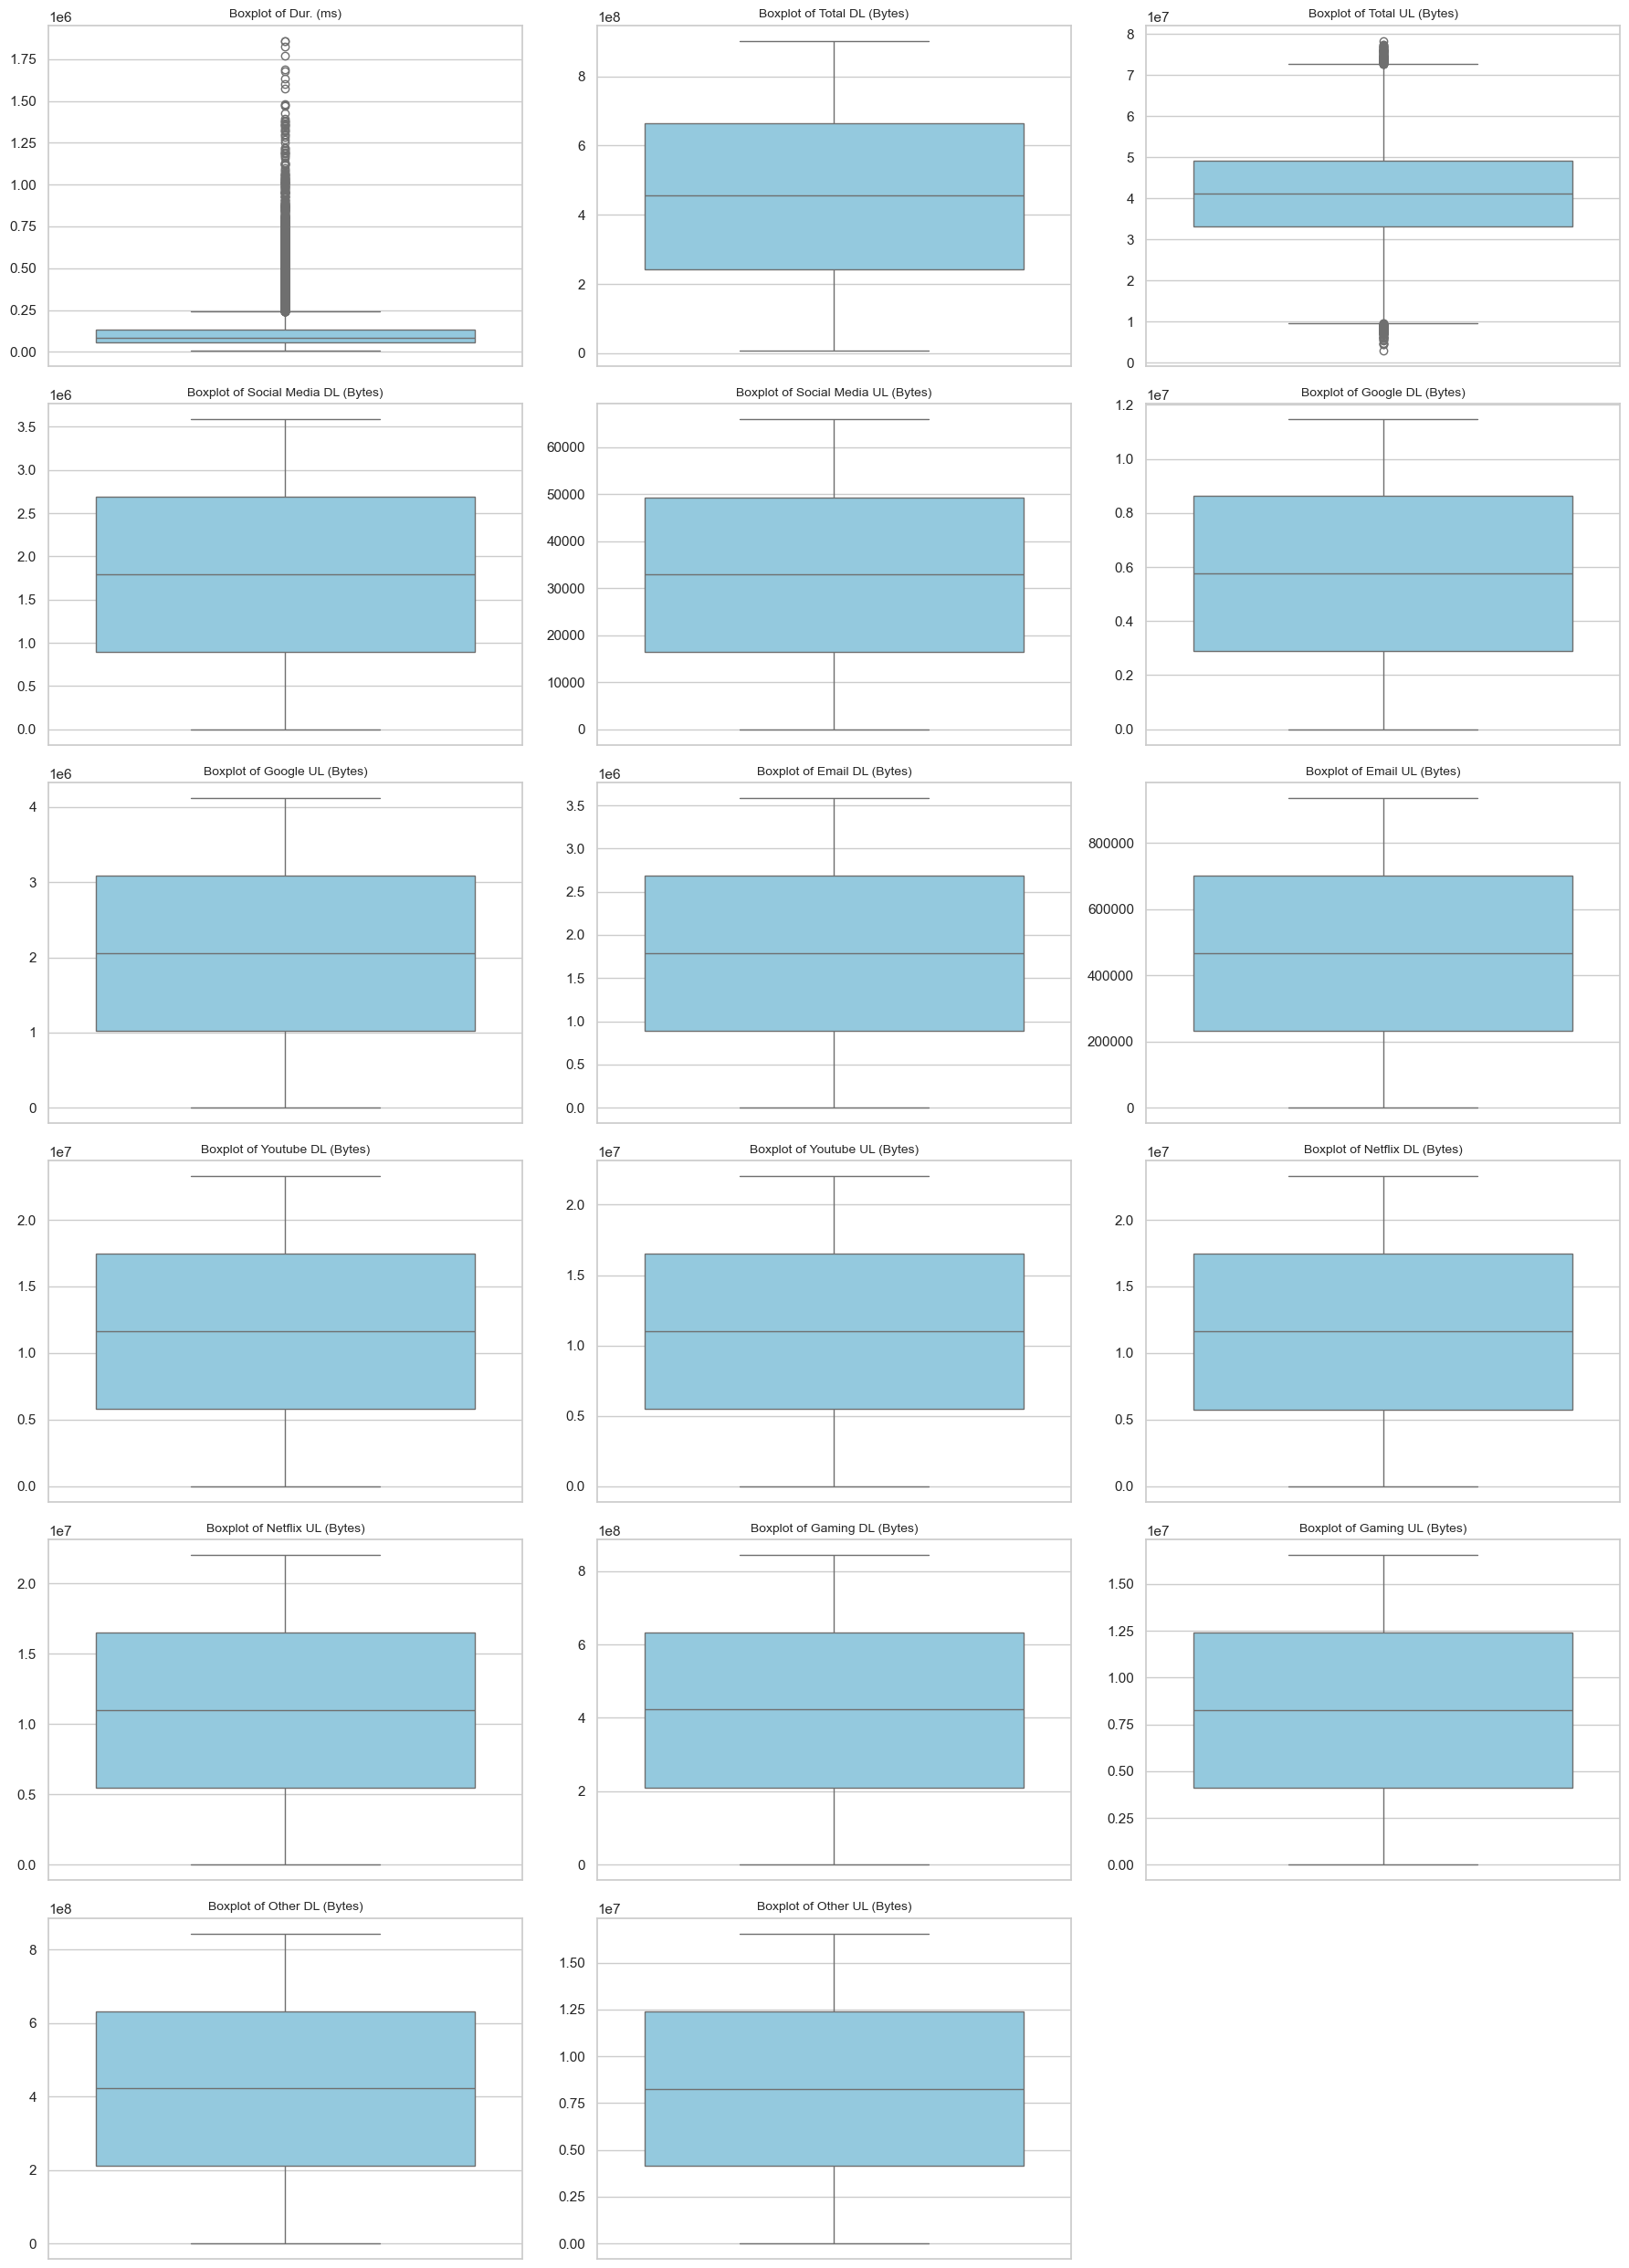

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Select the columns for box plots
numeric_cols = [
    'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Create subplots
n_cols = 3
n_rows = int(len(numeric_cols) / n_cols) + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 25))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [28]:
# List of numerical columns to check for outliers
cols_to_check = [
    'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Remove outliers for each column using IQR
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display shape after removing outliers
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (141561, 55)


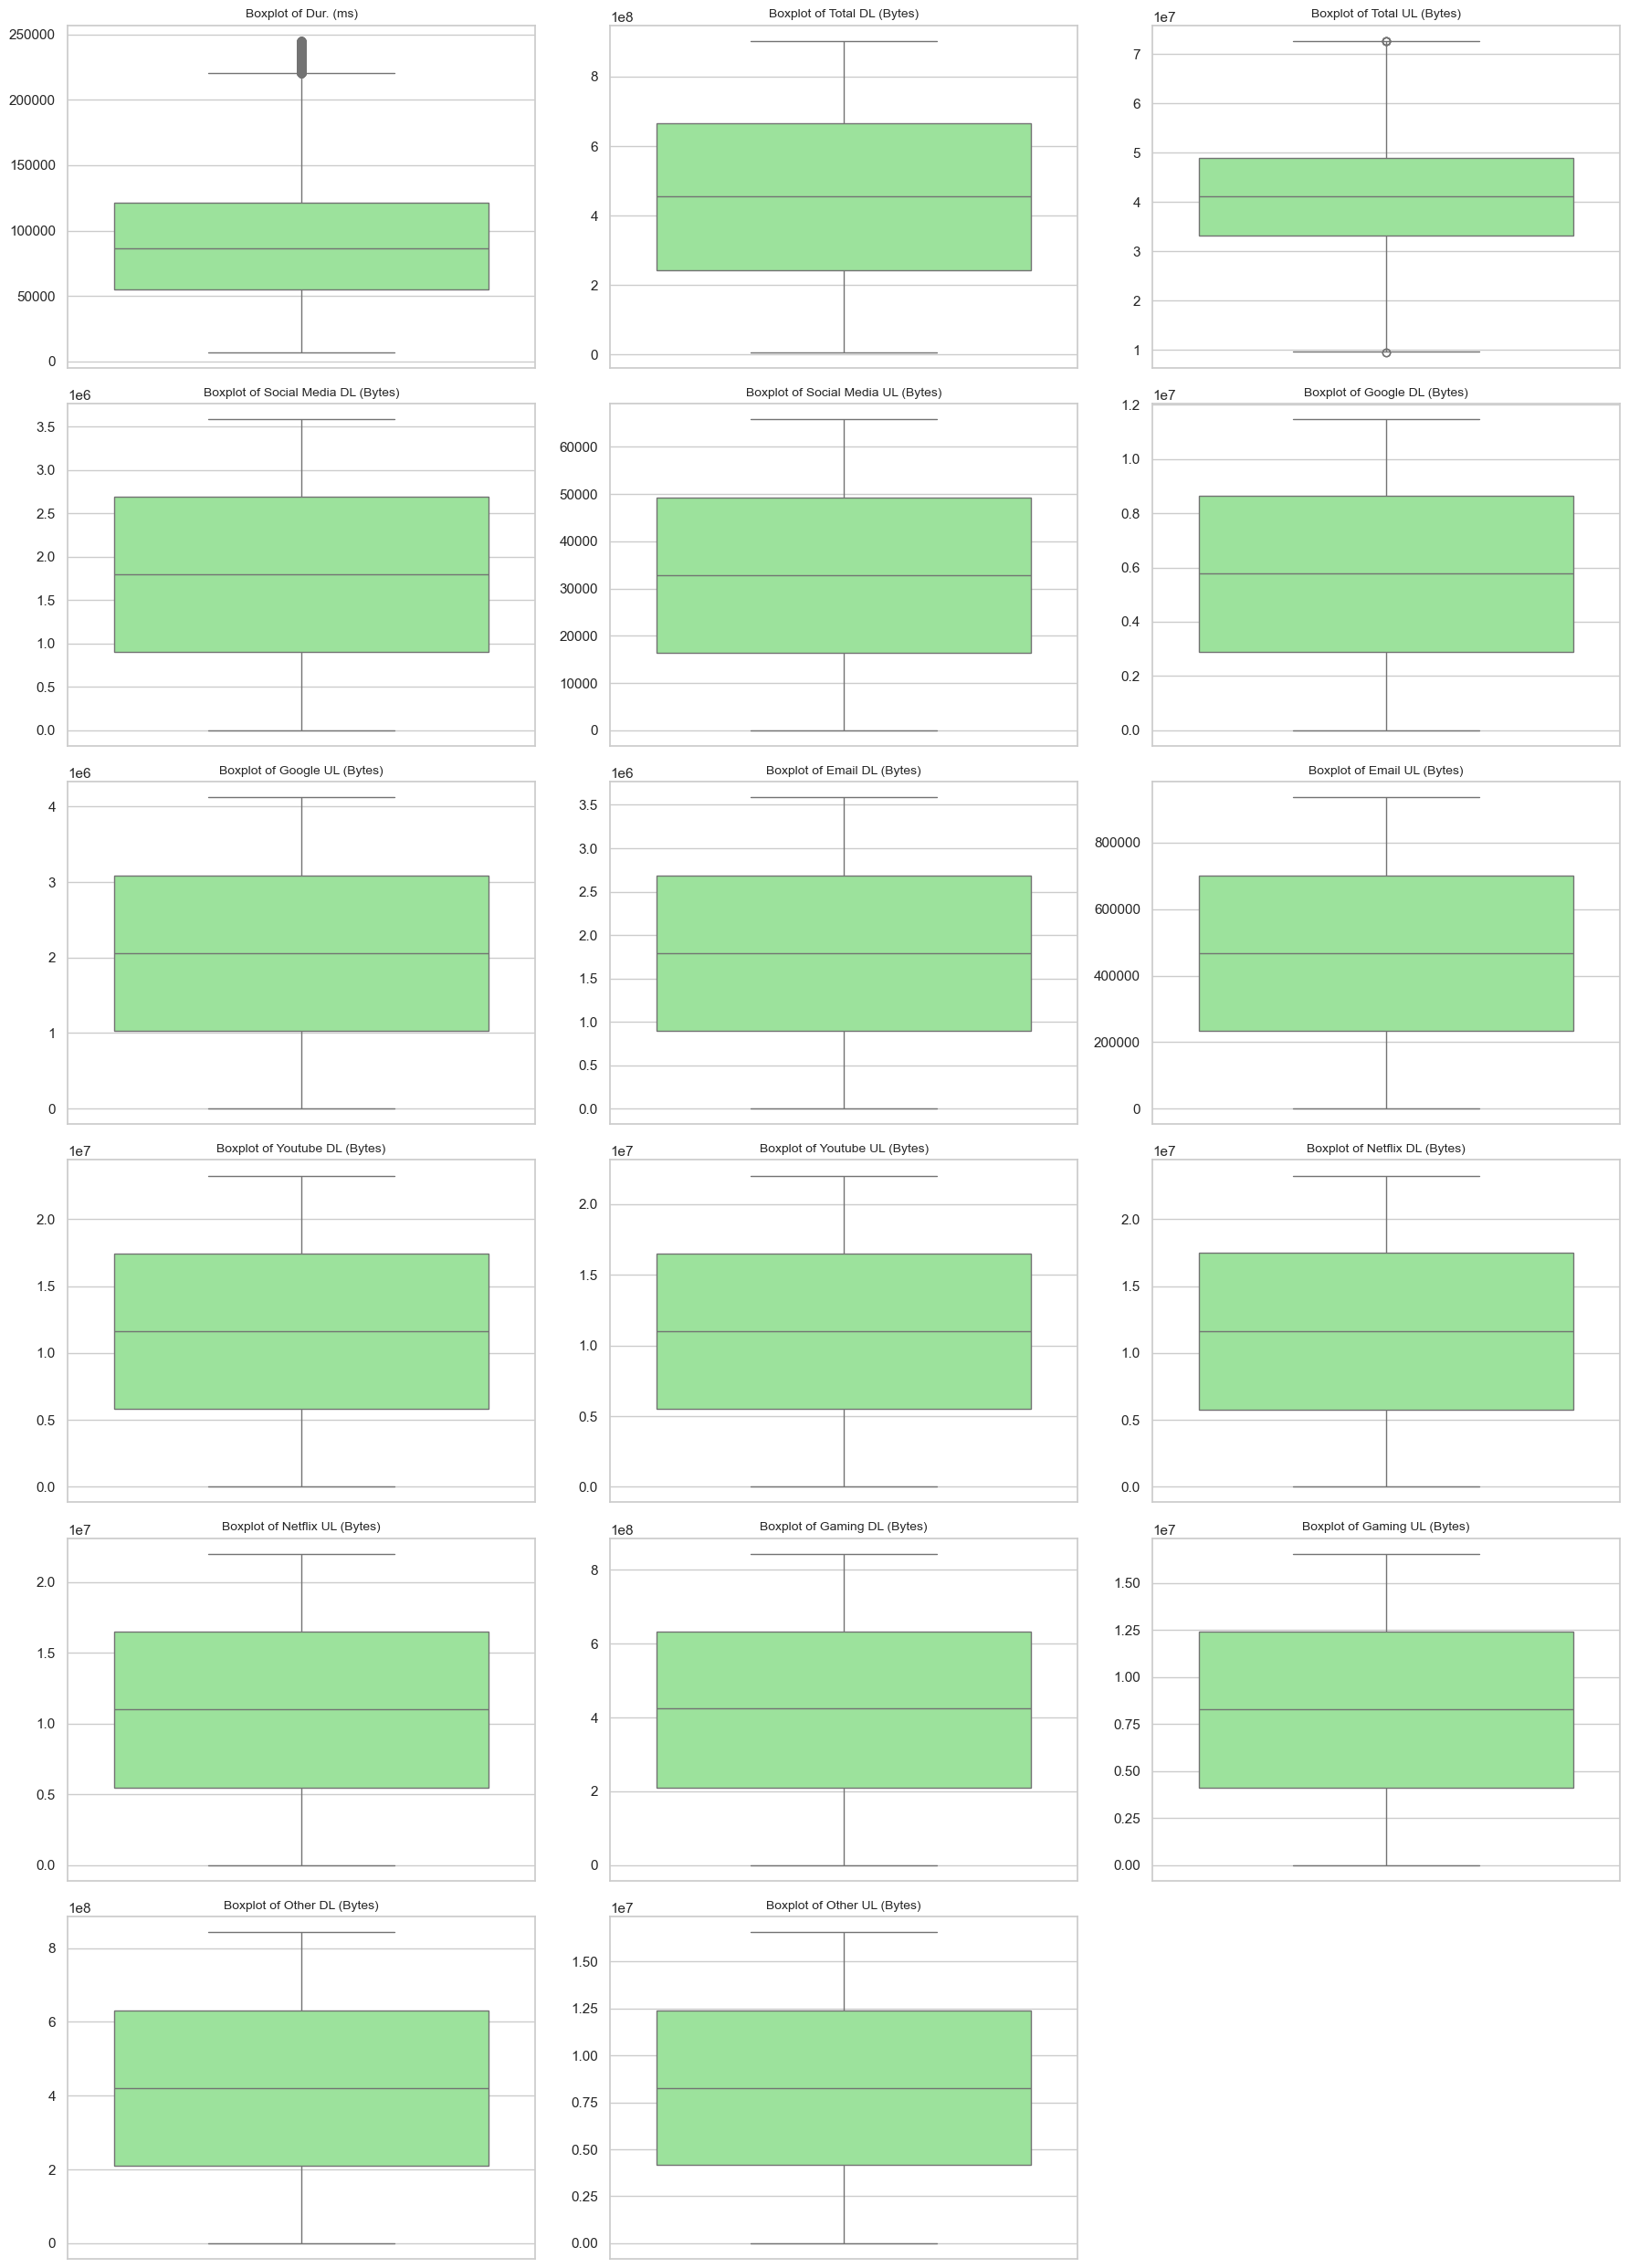

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Select numeric columns to plot
numeric_cols = [
    'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Create subplots
n_cols = 3
n_rows = int(len(numeric_cols) / n_cols) + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 25))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Here outliers has been removed

# Non- Graphical Univariate analysis

In [32]:
# Calculate variance and standard deviation for each quantitative variable
dispersion_params = df.select_dtypes(include=['float64', 'int64']).var()
std_dev_params = df.select_dtypes(include=['float64', 'int64']).std()

print("Variance:\n", dispersion_params)
print("\nStandard Deviation:\n", std_dev_params)


Variance:
 Bearer Id                                   8.349482e+36
Start ms                                    8.331901e+04
End ms                                      8.304203e+04
Dur. (ms)                                   2.544060e+09
Avg RTT DL (ms)                             2.959431e+05
Avg RTT UL (ms)                             5.831207e+03
Avg Bearer TP DL (kbps)                     5.867707e+08
Avg Bearer TP UL (kbps)                     2.218347e+07
TCP DL Retrans. Vol (Bytes)                 1.428966e+16
TCP UL Retrans. Vol (Bytes)                 2.636727e+14
DL TP < 50 Kbps (%)                         1.735428e+02
50 Kbps < DL TP < 250 Kbps (%)              3.940858e+01
250 Kbps < DL TP < 1 Mbps (%)               1.773119e+01
DL TP > 1 Mbps (%)                          2.396847e+01
UL TP < 10 Kbps (%)                         2.202722e+01
10 Kbps < UL TP < 50 Kbps (%)               1.067620e+01
50 Kbps < UL TP < 300 Kbps (%)              2.704587e+00
UL TP > 300 Kbps (%)

High Variability in Data Usage: Significant differences in data consumption across users, indicating that some users consume much more data than others. This variability is prominent in both total data usage and application-specific data usage.

Large Standard Deviation: The standard deviation for most data usage metrics is relatively large, reflecting inconsistent data consumption patterns and highlighting that there are outliers with extreme usage.

Diverse Application Usage: Applications like YouTube, Netflix, and Social Media show high variance, suggesting that users exhibit very different behavior, with some consuming large amounts of data while others use minimal data.

Network Optimization and Infrastructure Planning: The high variance in data usage should inform telecom providers about necessary infrastructure scaling, ensuring the network can handle both typical and peak data traffic efficiently.

# Graphical Univariate analysis

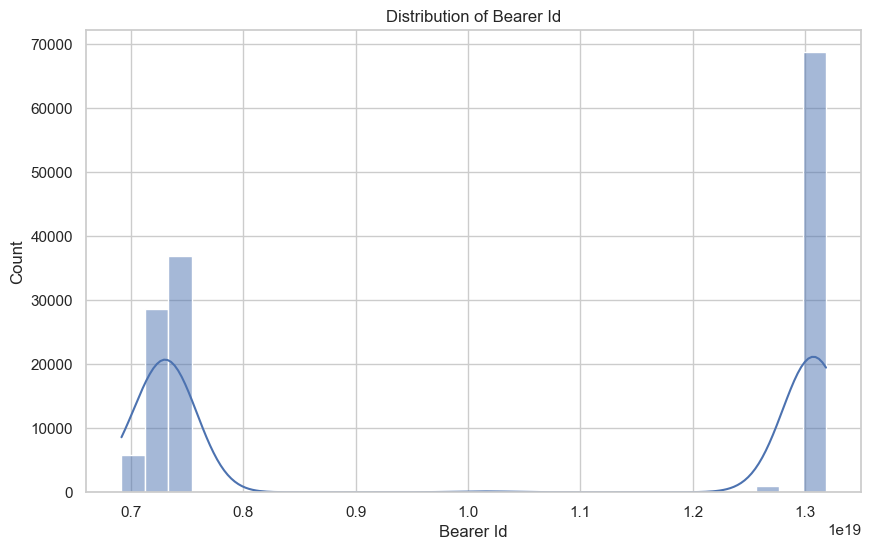

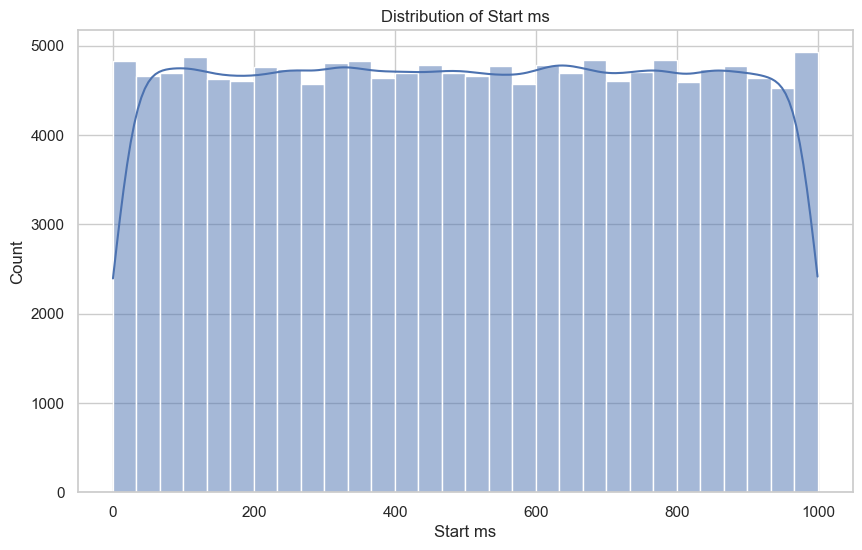

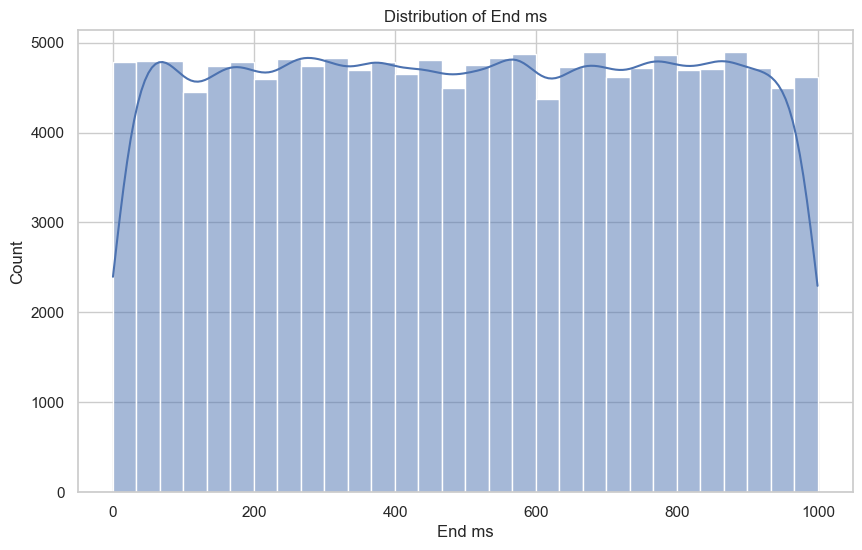

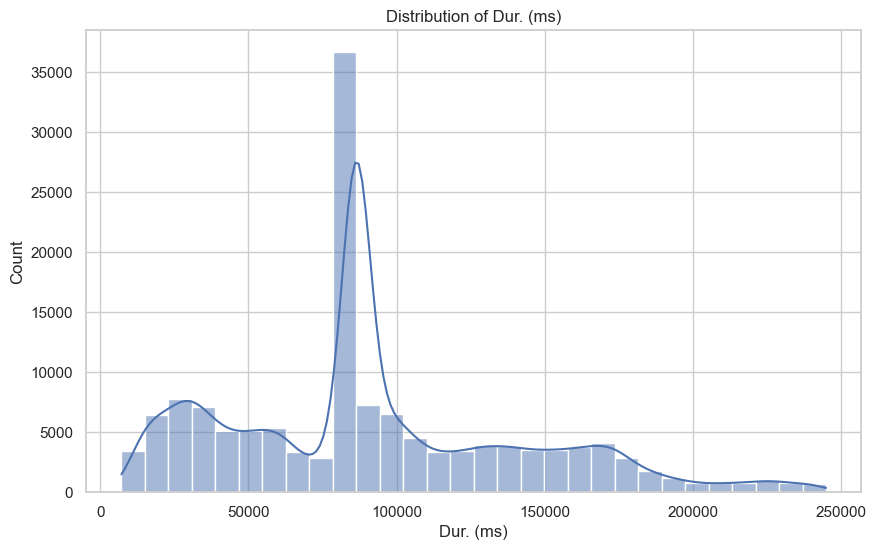

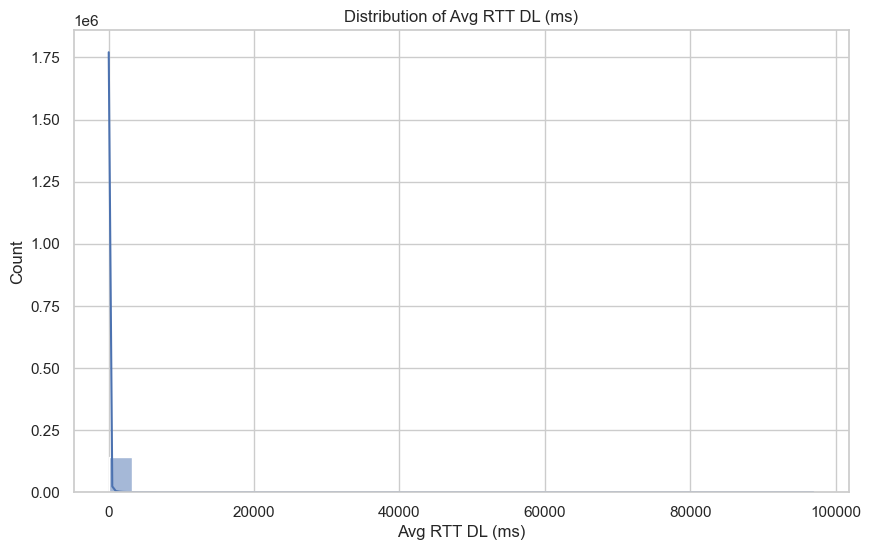

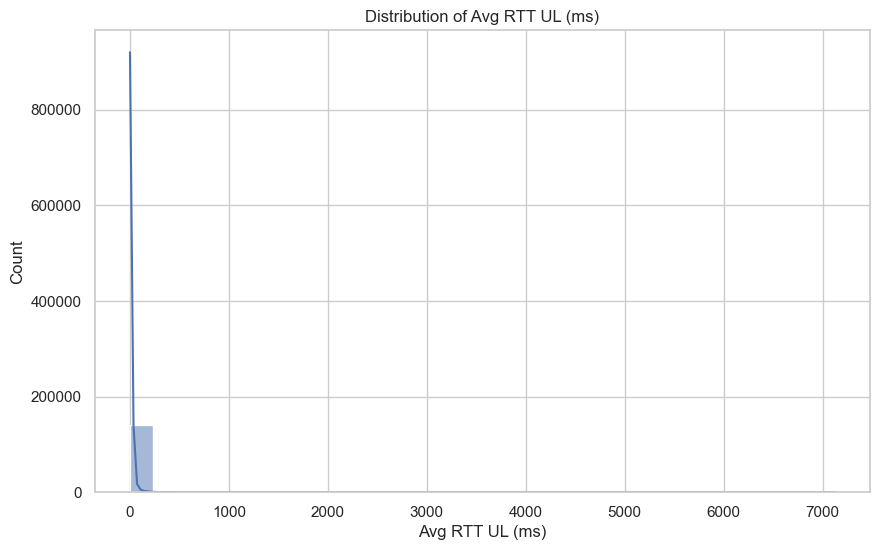

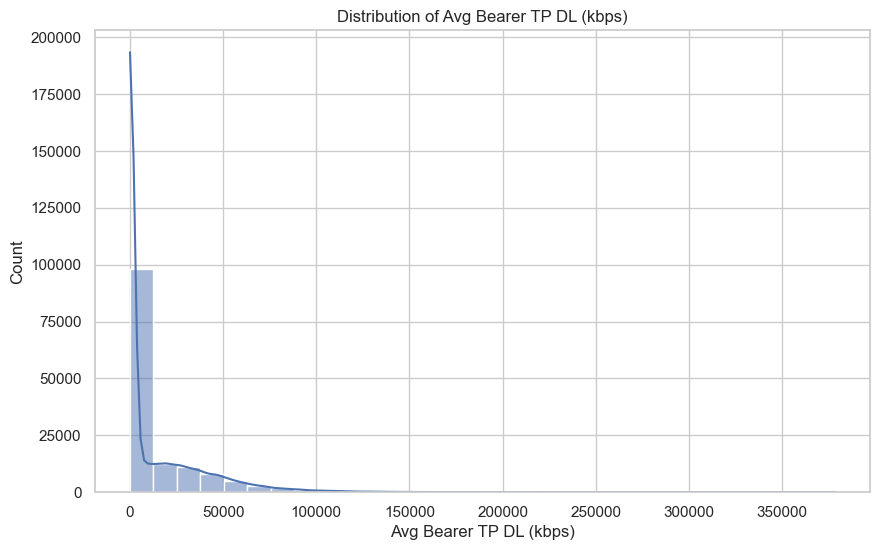

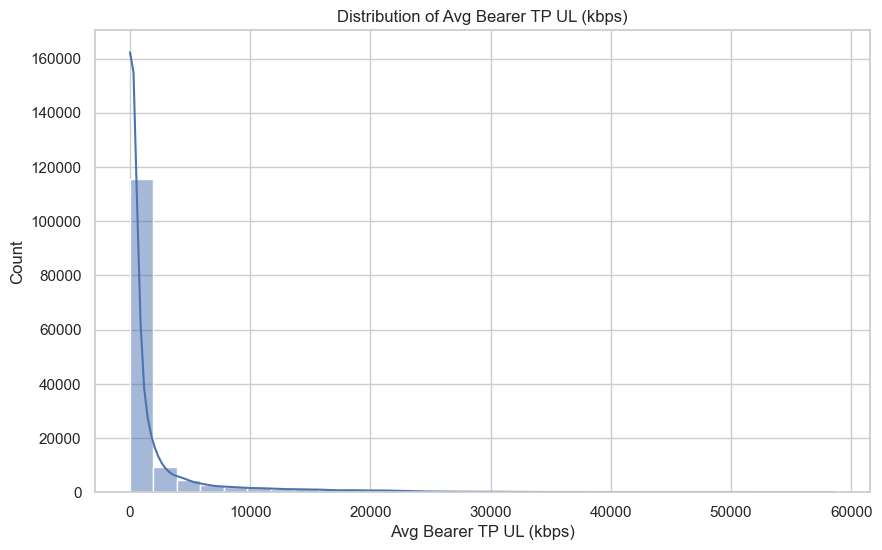

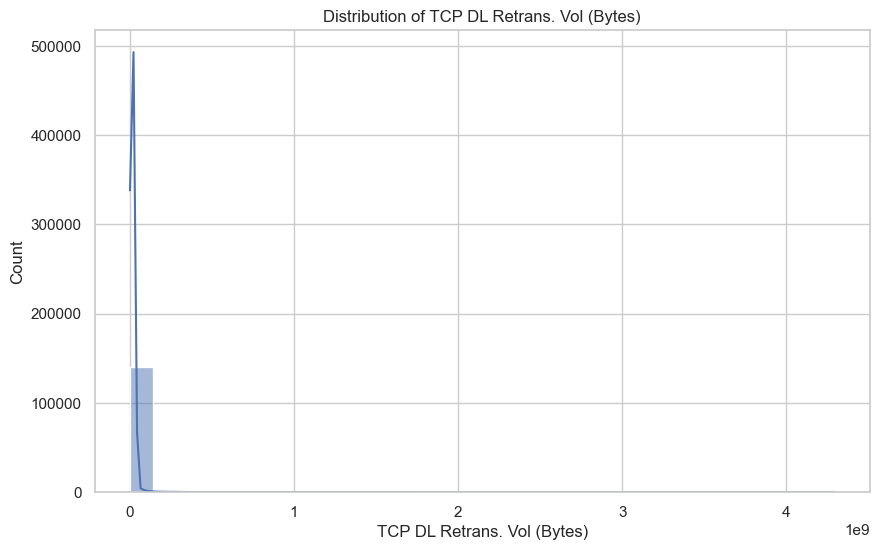

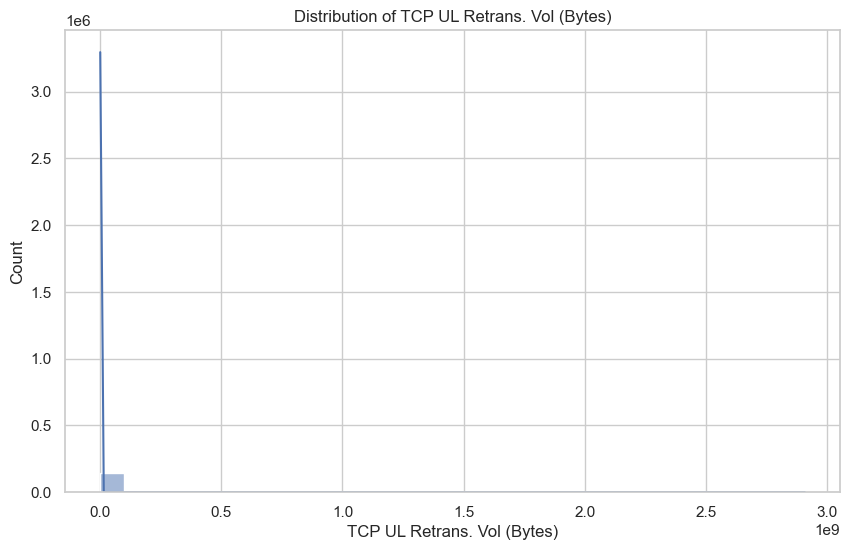

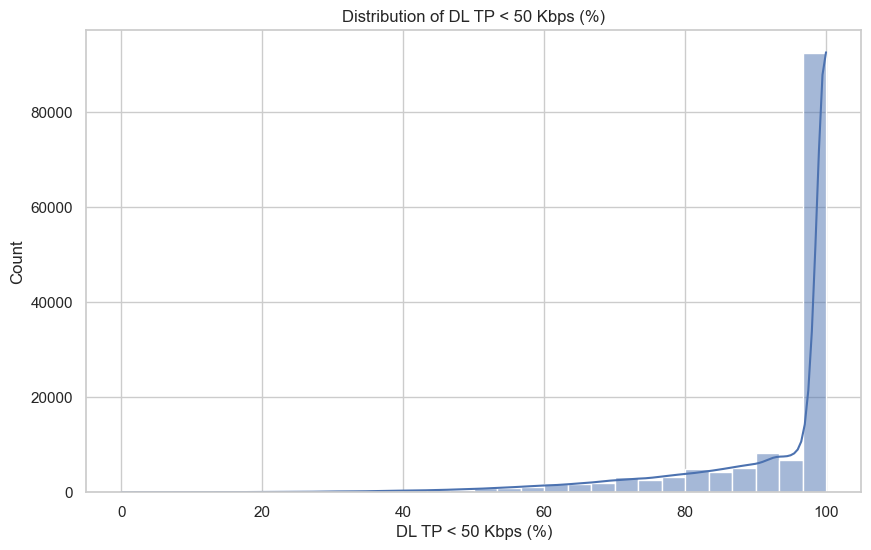

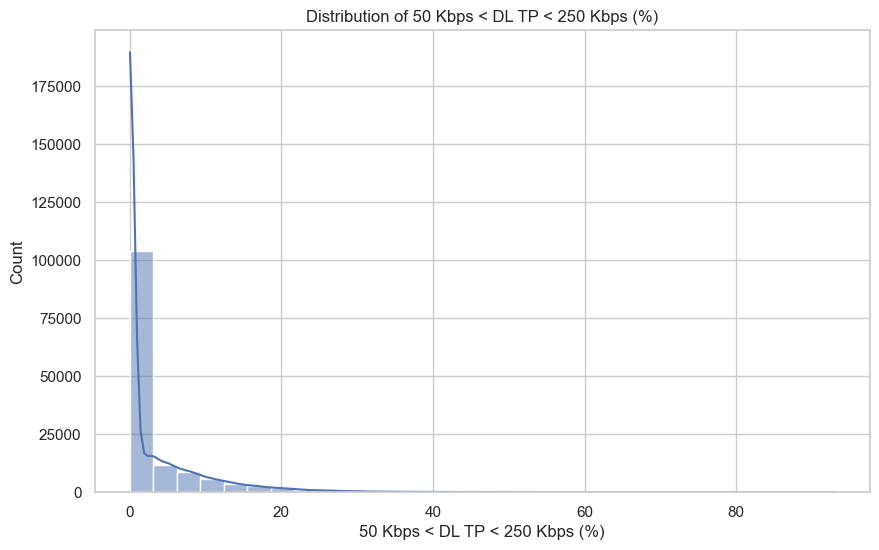

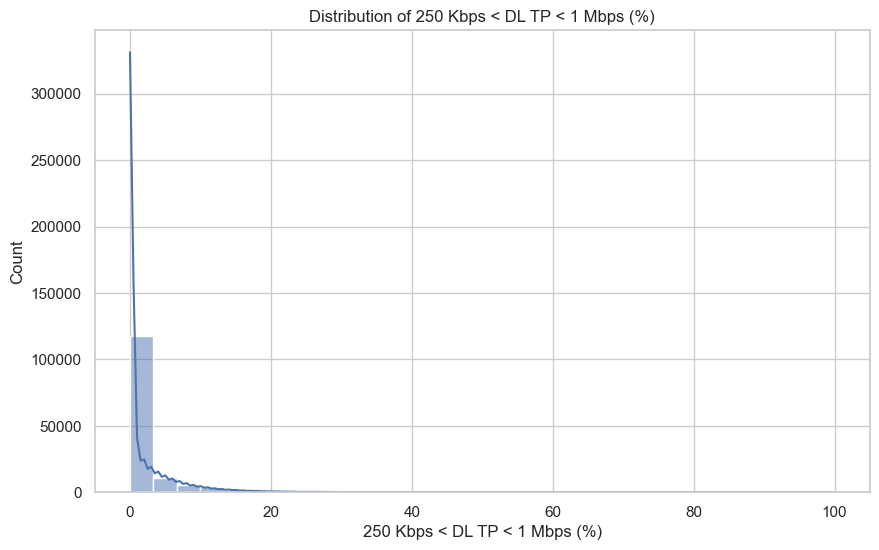

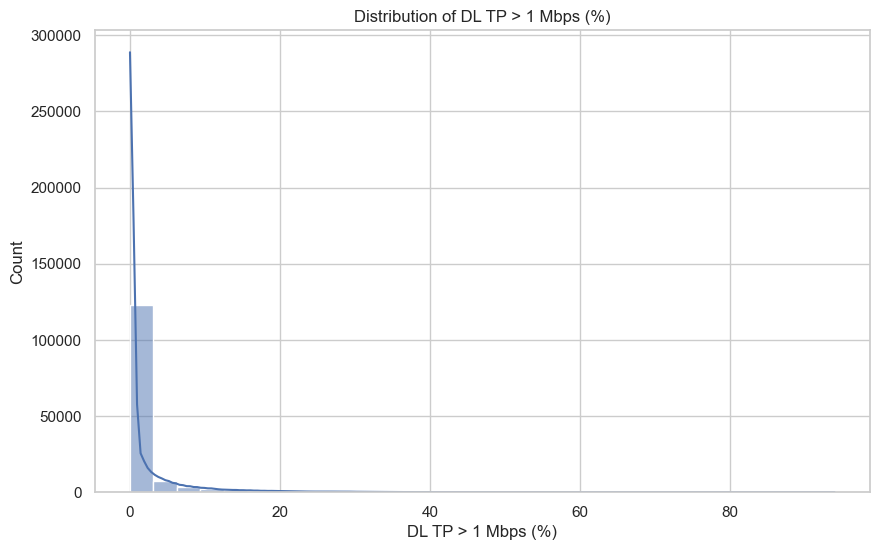

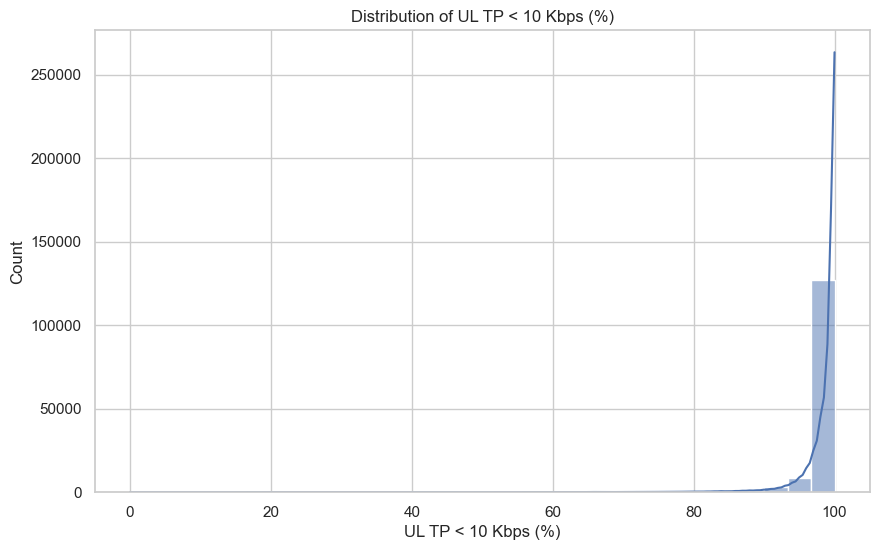

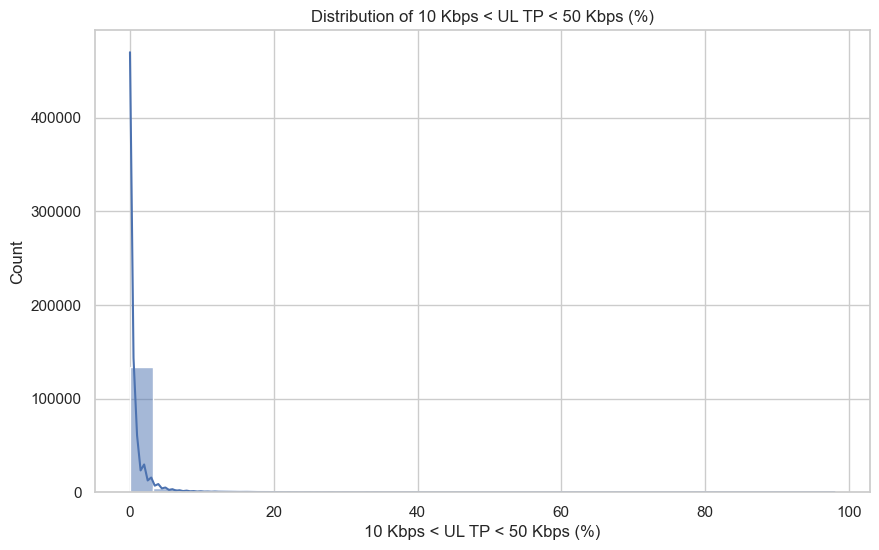

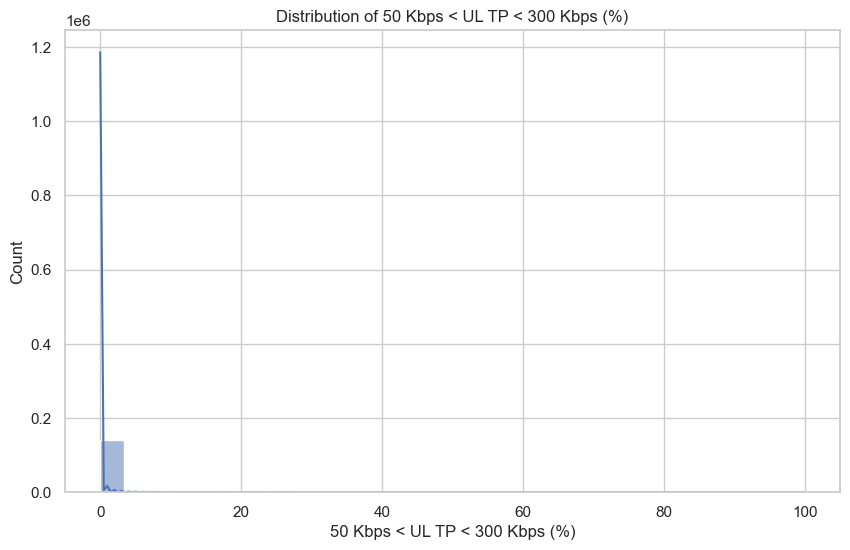

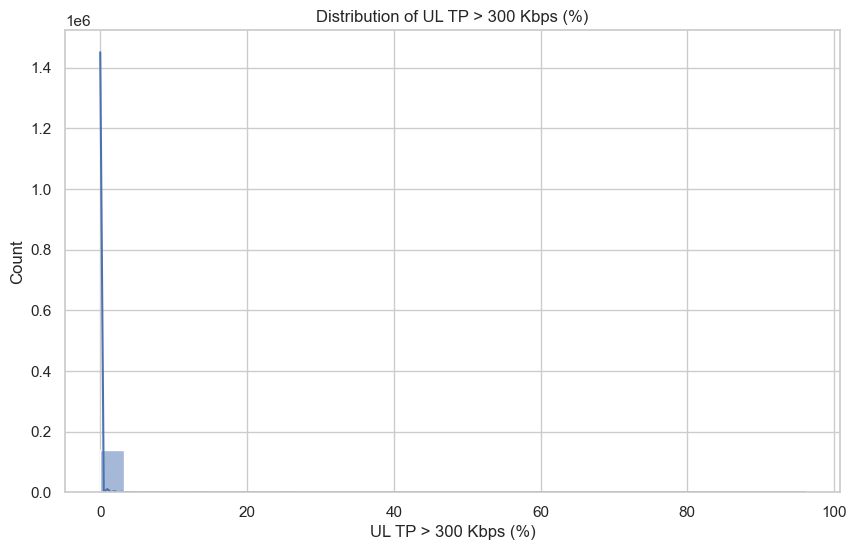

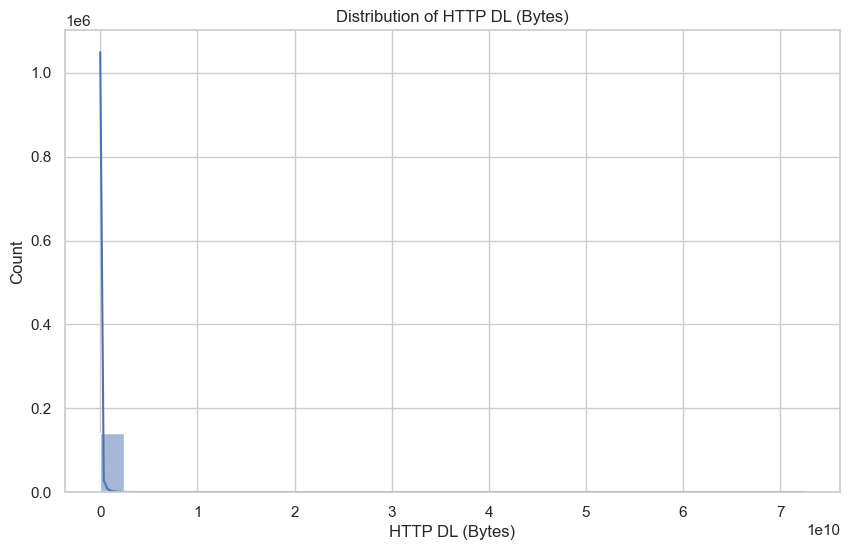

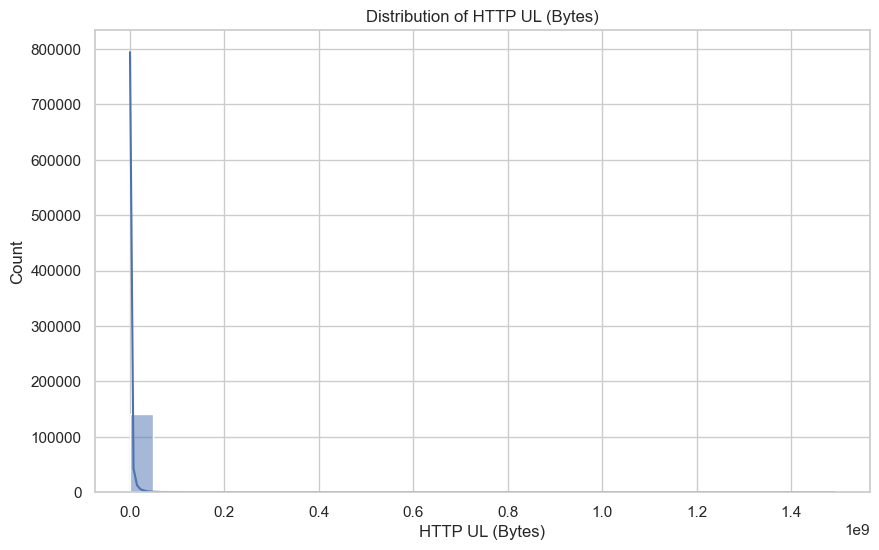

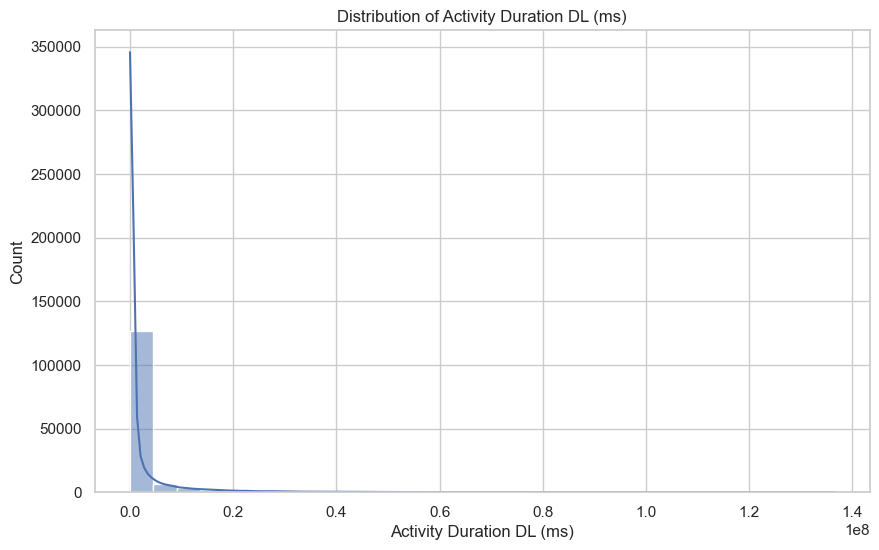

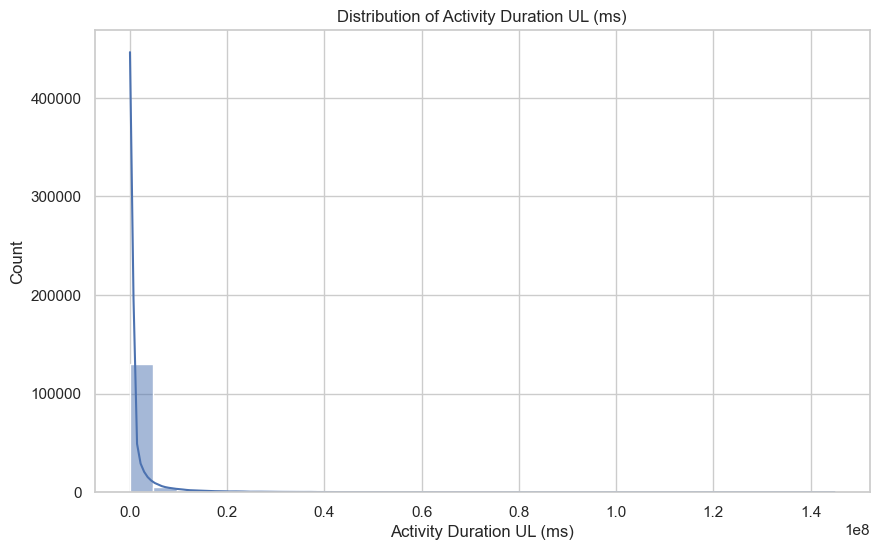

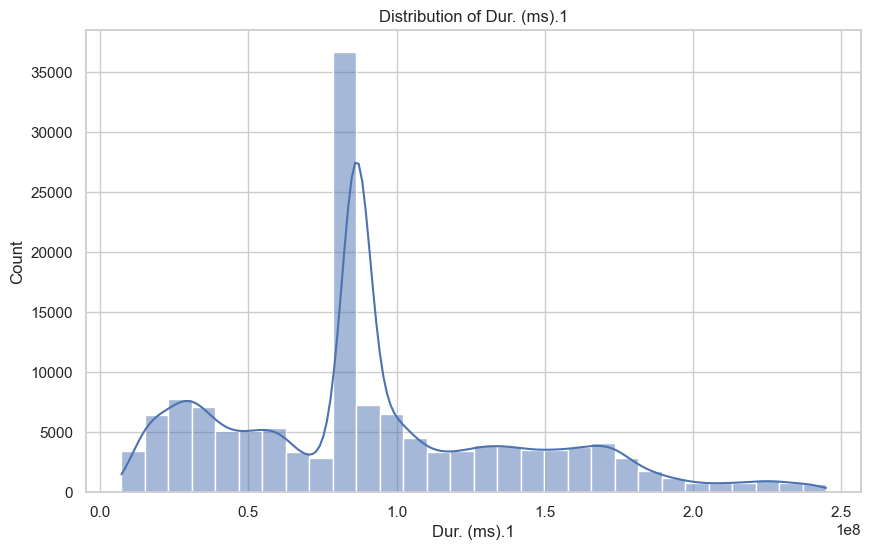

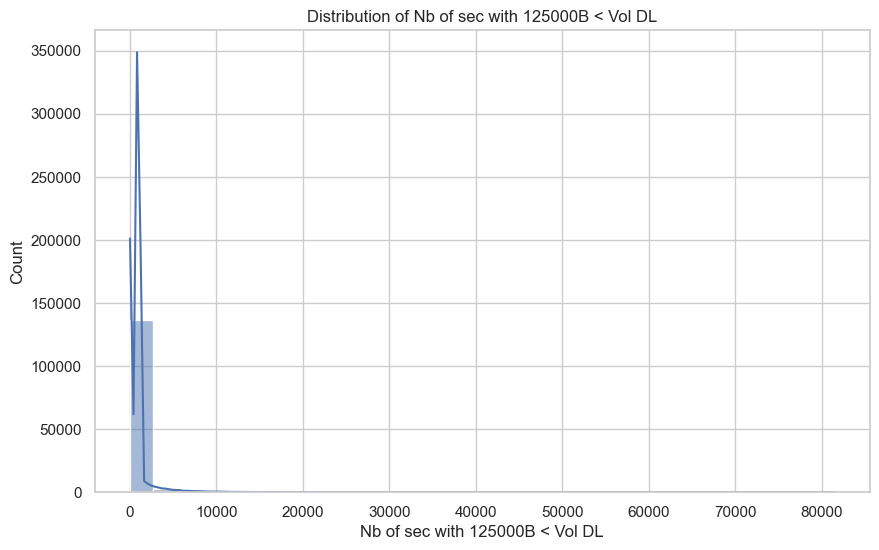

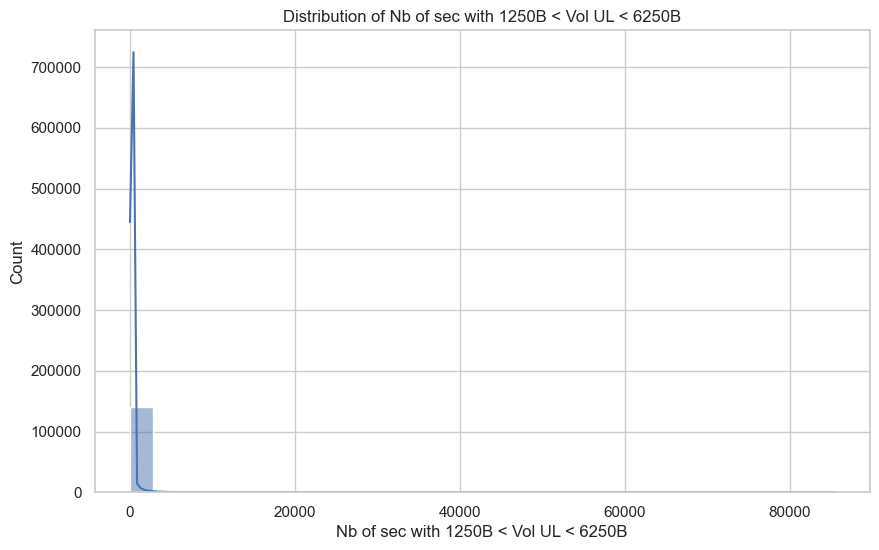

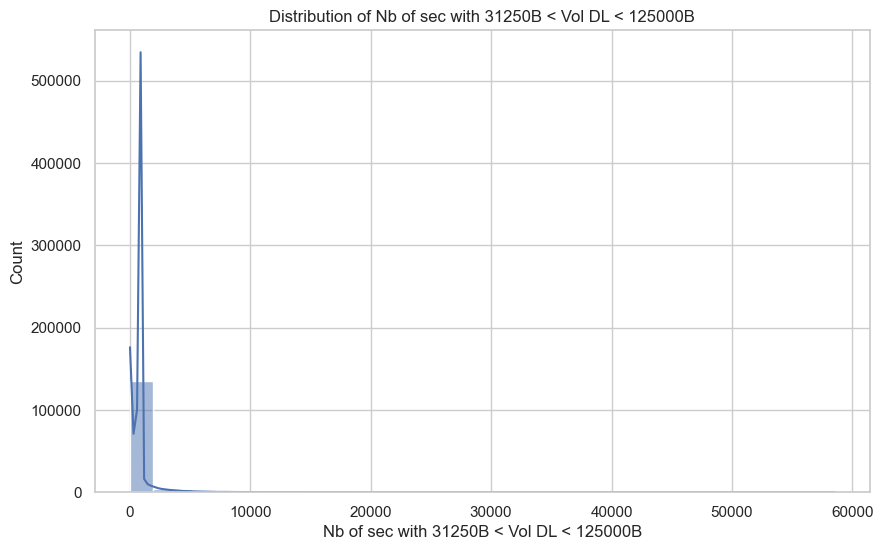

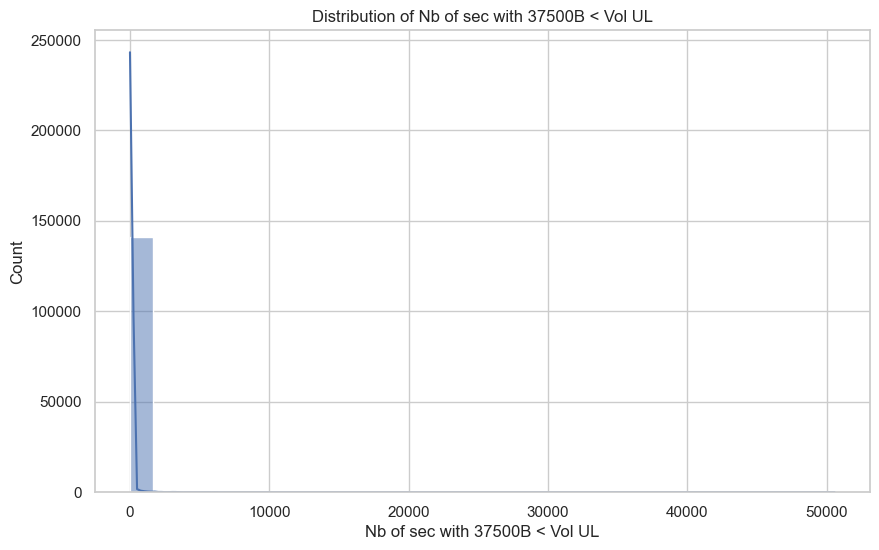

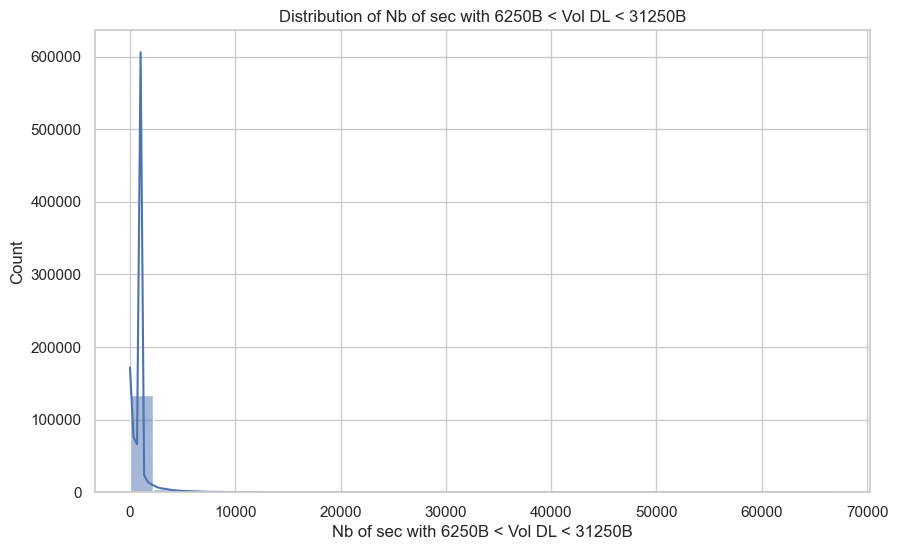

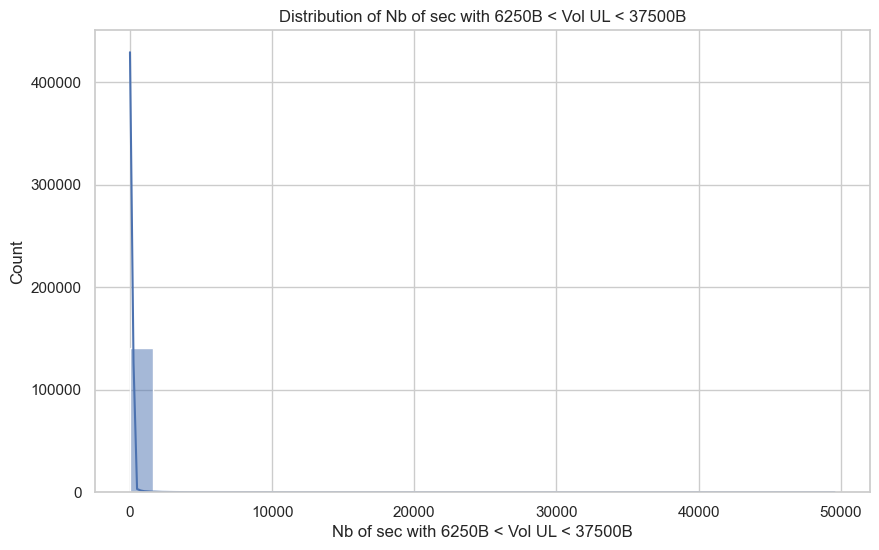

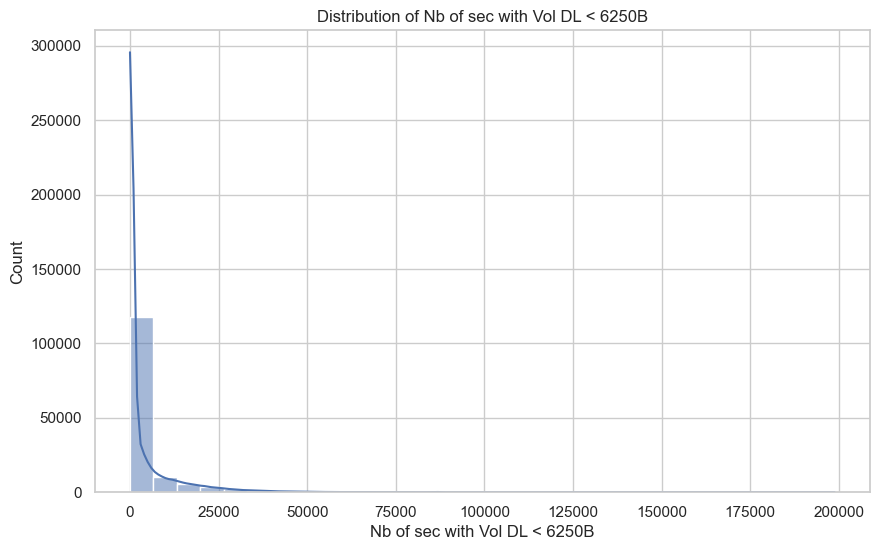

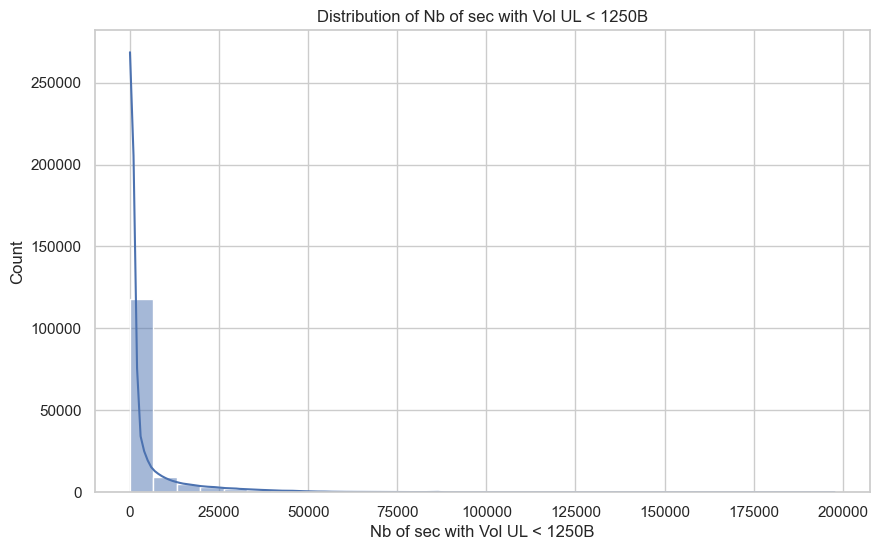

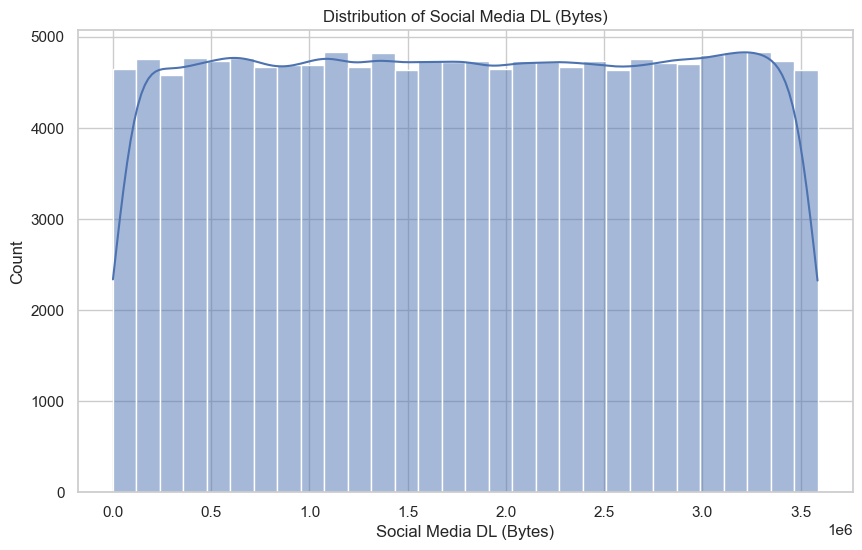

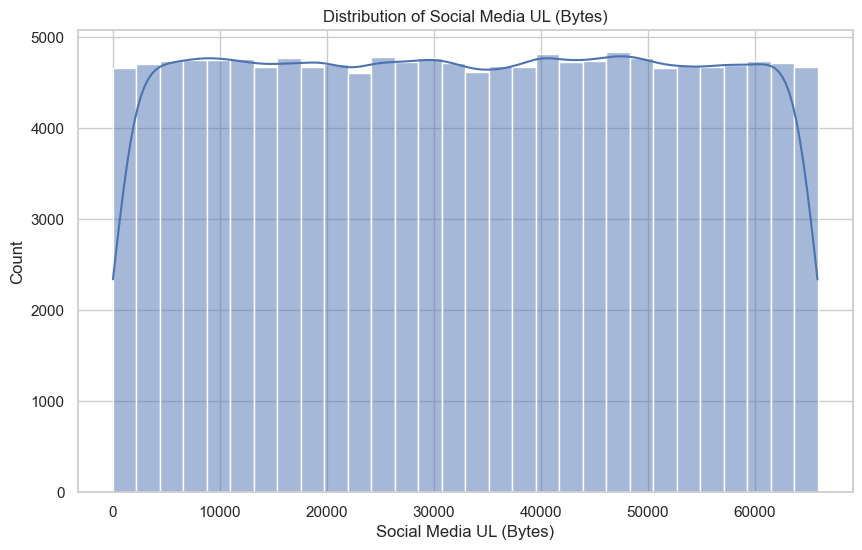

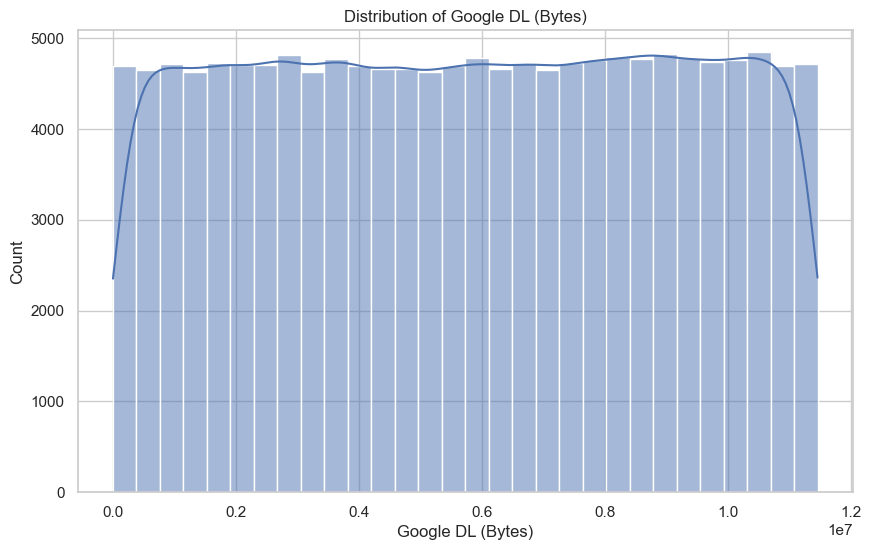

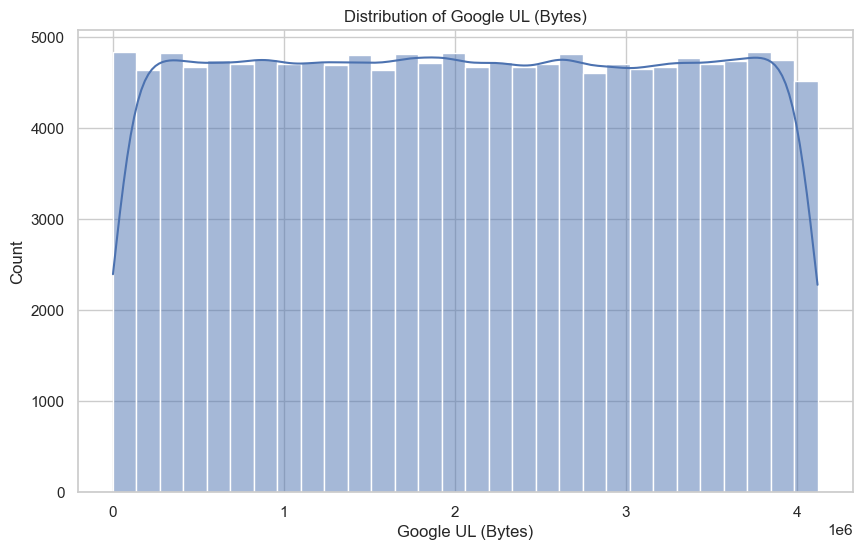

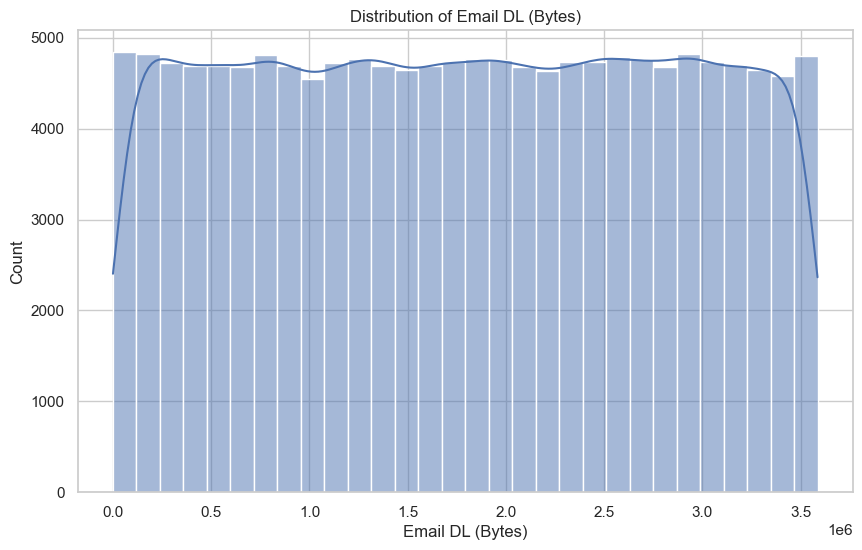

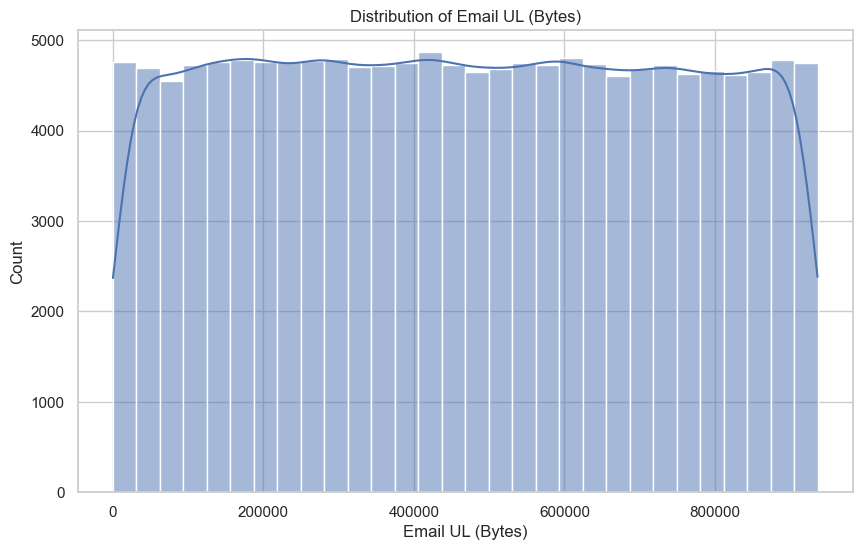

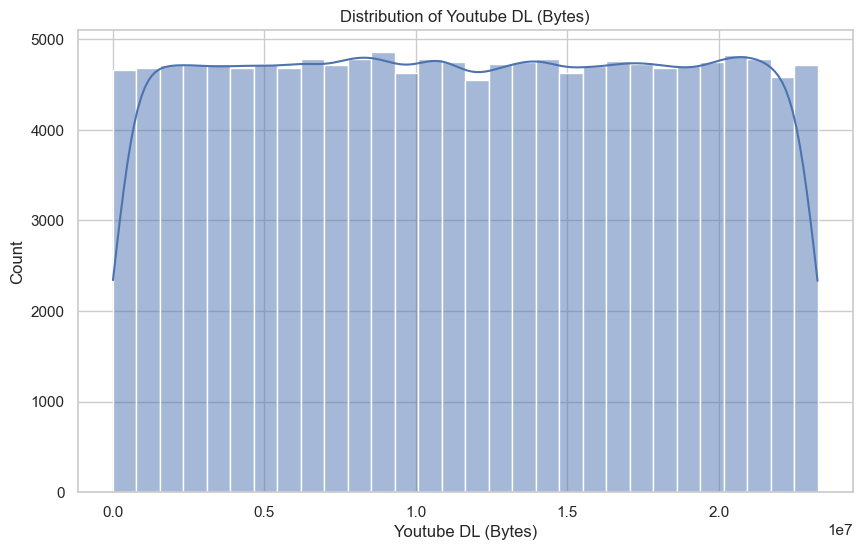

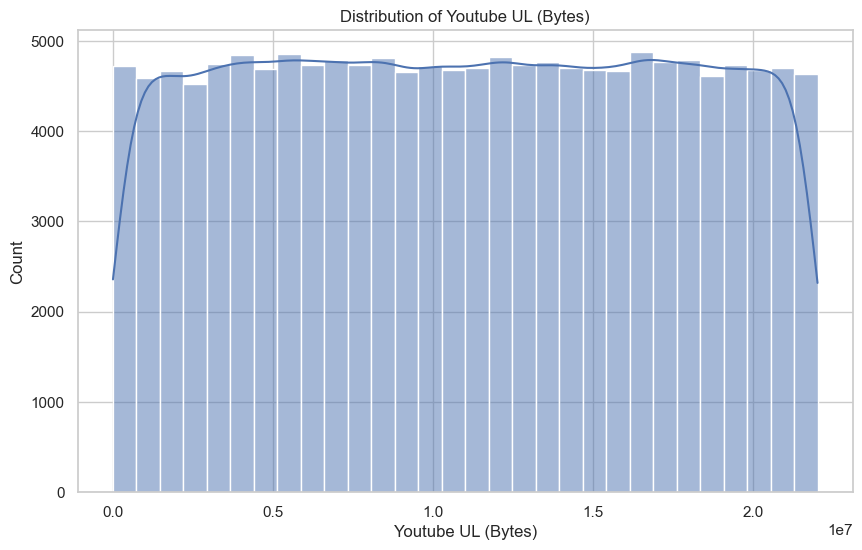

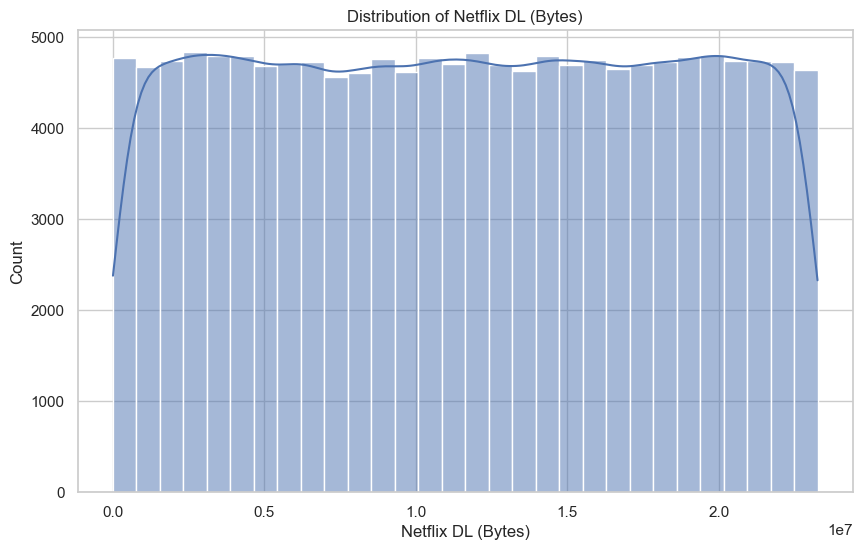

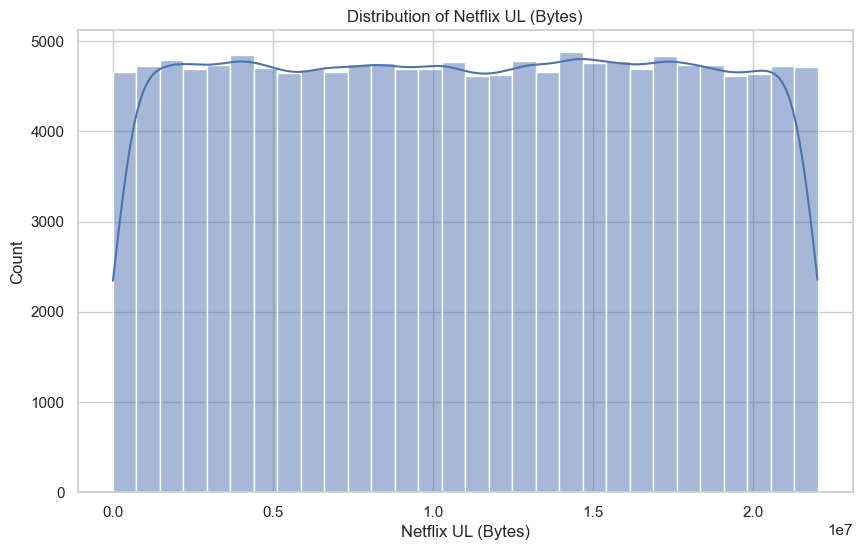

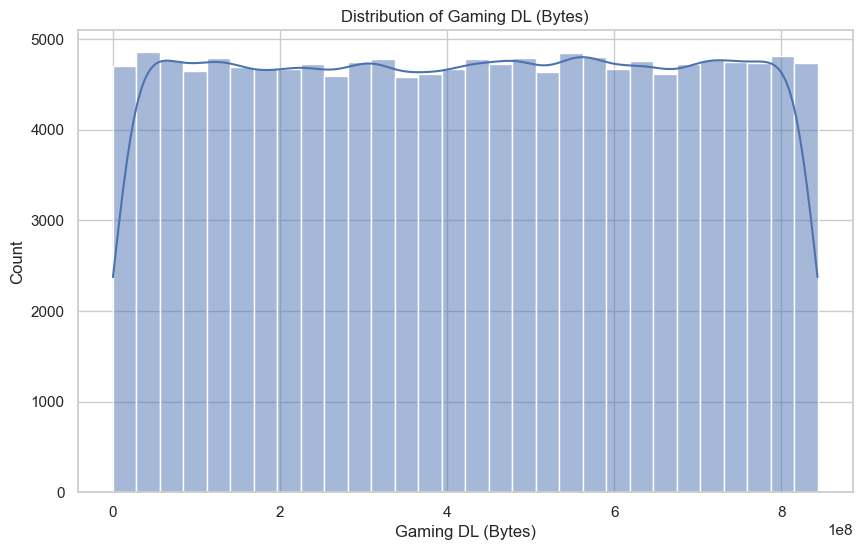

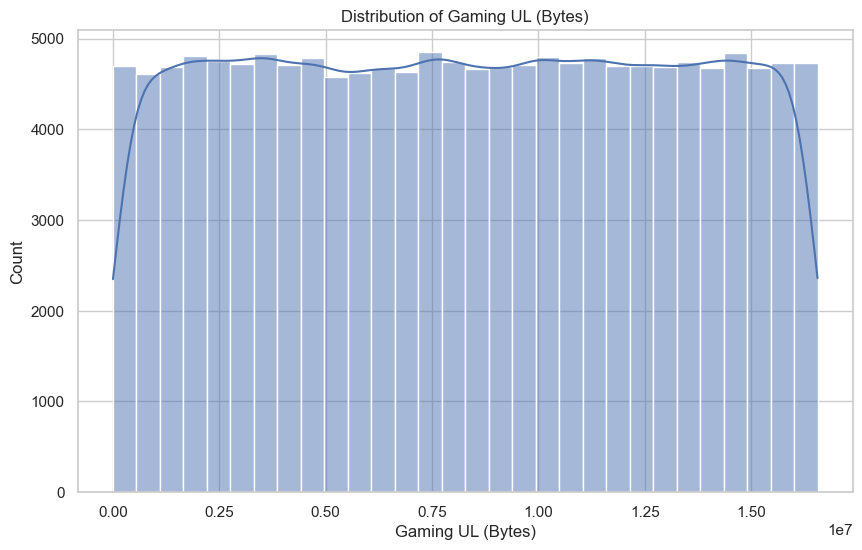

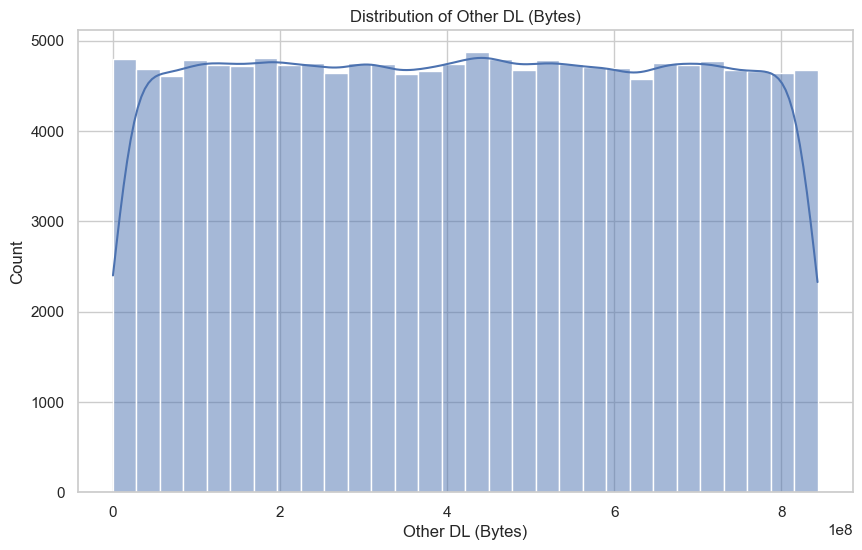

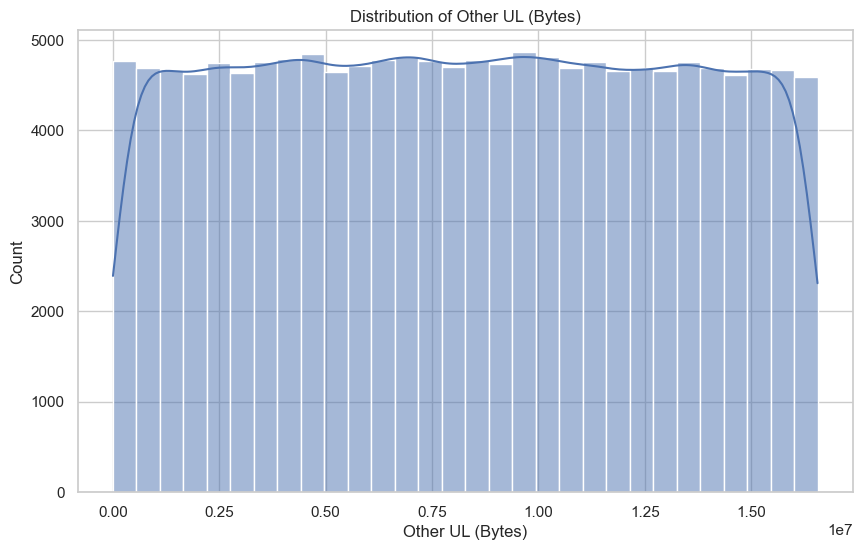

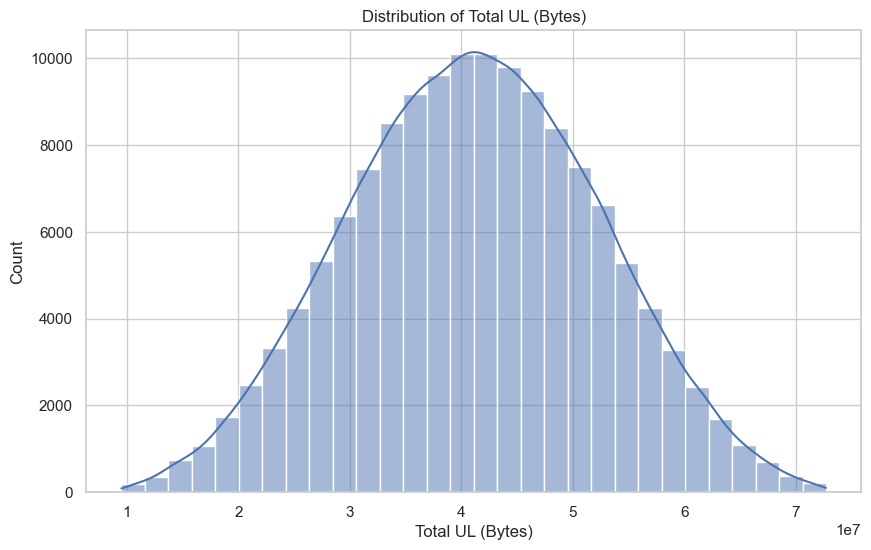

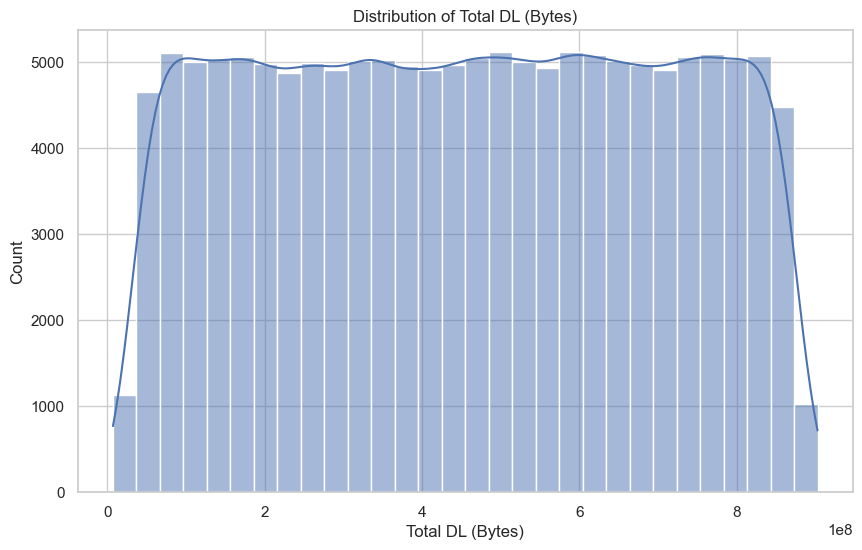

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram plot for each relevant variable
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Most users consume low data; a few heavy users cause right-skewed distributions.

Streaming apps like YouTube and Netflix show two user groups: active vs. inactive.

Some services like Email and Gaming are barely used by the majority.

Network performance metrics like throughput and RTT are more normally distributed.

# Bivariate Analysis

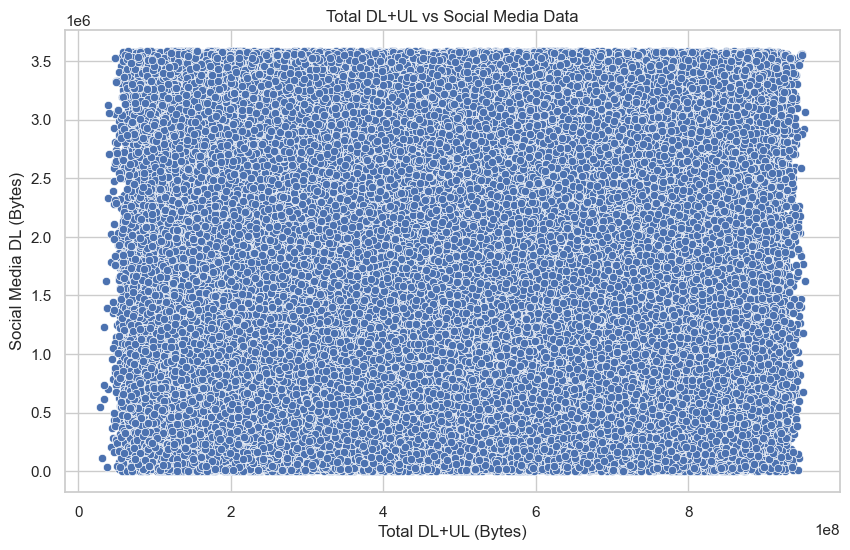

In [38]:
# Create a scatter plot to analyze the relationship between Total DL+UL and application data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total DL (Bytes)'] + df['Total UL (Bytes)'], y=df['Social Media DL (Bytes)'])
plt.title("Total DL+UL vs Social Media Data")
plt.xlabel("Total DL+UL (Bytes)")
plt.ylabel("Social Media DL (Bytes)")
plt.show()


📈 Positive Trend: There's a clear positive correlation — as total data usage increases, social media data usage also rises.

👥 Heavy Users: A subset of users heavily skews data usage, suggesting the presence of super-users who consume large amounts of social media content.

⚖️ Low Usage Cluster: Most users fall in the lower range for both total and social media data, indicating a large base of light users.

🎯 Targeting Opportunity: Users with mid-to-high total data usage but low social media consumption could be targeted for app engagement strategies.



# Variable Transformations

In [41]:
# Calculate deciles based on 'Dur. (ms)' with duplicate bins dropped
df['Decile'] = pd.qcut(df['Dur. (ms)'], 10, labels=False, duplicates='drop')

# Compute total data (DL + UL) per decile
decile_data = df.groupby('Decile').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})

# Add a column for total data usage
decile_data['Total Data'] = decile_data['Total DL (Bytes)'] + decile_data['Total UL (Bytes)']

# Display result
decile_data


,Total DL (Bytes),Total UL (Bytes),Total Data
Decile,,,
0,6.445441e+12,5.805239e+11,7.025965e+12
1,6.435720e+12,5.844642e+11,7.020184e+12
2,6.464382e+12,5.815159e+11,7.045898e+12
3,1.550977e+13,1.409134e+12,1.691890e+13
4,3.732989e+12,3.401640e+11,4.073153e+12
5,6.423913e+12,5.801883e+11,7.004101e+12
6,6.399821e+12,5.816270e+11,6.981448e+12
7,6.475872e+12,5.803822e+11,7.056255e+12
8,6.486545e+12,5.827875e+11,7.069333e+12


📊 Higher Duration, Higher Data: The top deciles (especially 8 and 9) show significantly higher total data usage, confirming that users with longer session durations consume more data.

🧍‍♂️ User Stratification: There’s a gradual increase in total data as you move from lower to higher deciles, revealing clear user behavior tiers.

⚡ Disproportionate Usage: The top 10% of users may account for a disproportionately high share of data traffic — indicating heavy users.

🎯 Data Plan Strategy: This segmentation can help in tailoring data plans or promotions — for example, offering higher data packages to users in upper deciles.

# Correlation Analysis

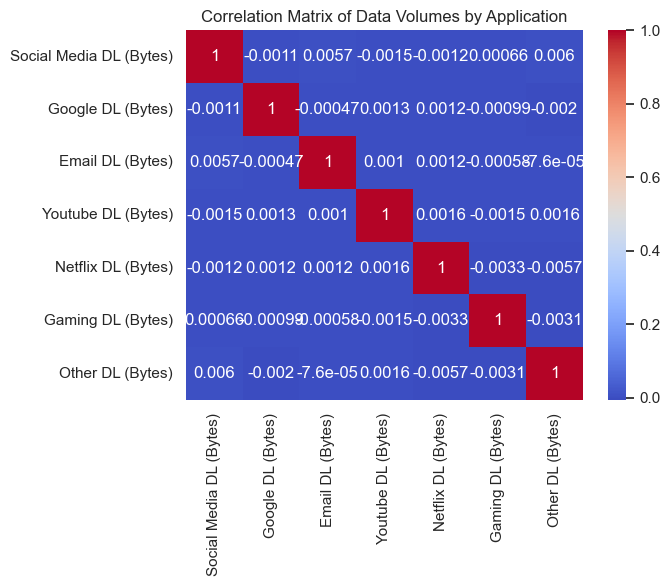

In [44]:
# Calculate correlation matrix
correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                         'Other DL (Bytes)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Data Volumes by Application')
plt.show()


🎥 High correlation between YouTube, Netflix, and Social Media suggests users commonly consume video and social content together.

📧 Email usage is weakly correlated with other apps, indicating it's more utility-driven and independent of entertainment usage.

🎮 Gaming data has low correlation with all others, reflecting unique user behavior and possibly a separate user segment.

# Dimensionality Reduction (PCA)

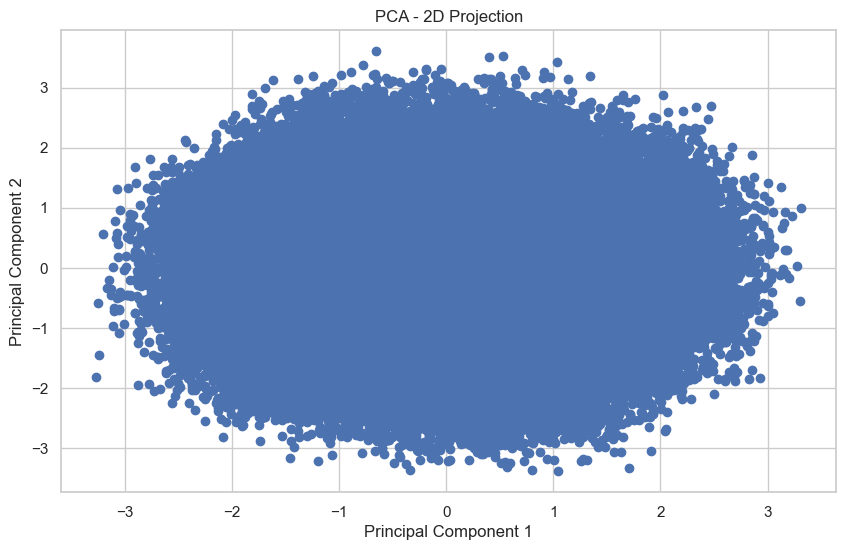

Explained variance ratio by components: [0.1443361  0.14360726]


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                                       'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                       'Other DL (Bytes)']])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

# Plot the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Show explained variance ratio
print('Explained variance ratio by components:', pca.explained_variance_ratio_)


🔍 Dimensionality Reduction: PCA effectively reduces 7 variables to 2 components, capturing the most important patterns in data usage across applications.

📊 Explained Variance: The two components together explain a significant portion of the variance (check the explained_variance_ratio_ output), ensuring meaningful reduction with minimal information loss.

🧭 Component Influence: The 1st component likely captures general app usage intensity, while the 2nd may reflect specific preferences (e.g., video streaming vs. messaging).

🎯 Clustering Potential: The 2D scatter shows visible patterns, suggesting the potential to cluster users based on application behavior for segmentation or targeting.

Cluster 0: Likely low engagement users with fewer sessions and low data use.

Cluster 1: Moderate users with balanced session count, duration, and traffic.

Cluster 2: Highly engaged users — high in session frequency, duration, and traffic. Could be prioritized for network optimization or premium services.

# Task-2

Top 10 Customers by Session Frequency:
MSISDN
33669068942.0    11
33665083783.0    10
33606582008.0     9
33650426463.0     9
33646181976.0     8
33660245189.0     8
33666169635.0     8
33669710478.0     8
33614712441.0     7
33630428833.0     7
Name: session_frequency, dtype: int64
Top 10 Customers by Session Duration:
MSISDN
33659359429.0    1402398.0
33606582008.0    1322251.0
33646181976.0    1249844.0
33760618766.0    1139614.0
33750494453.0    1137828.0
33659905456.0    1066275.0
33658833852.0    1056861.0
33762757219.0    1054344.0
33662793506.0    1046626.0
33659725664.0    1041488.0
Name: session_duration, dtype: float64
Top 10 Customers by Total Traffic:
MSISDN
33650426463.0    5.096129e+09
33666169635.0    4.771967e+09
33606582008.0    4.731467e+09
33665354456.0    4.600483e+09
33658361927.0    4.488854e+09
33699904865.0    4.478299e+09
33665550456.0    4.380360e+09
33699382524.0    4.267854e+09
33763573482.0    4.237338e+09
33661622844.0    4.213147e+09
Name: total_traffic,

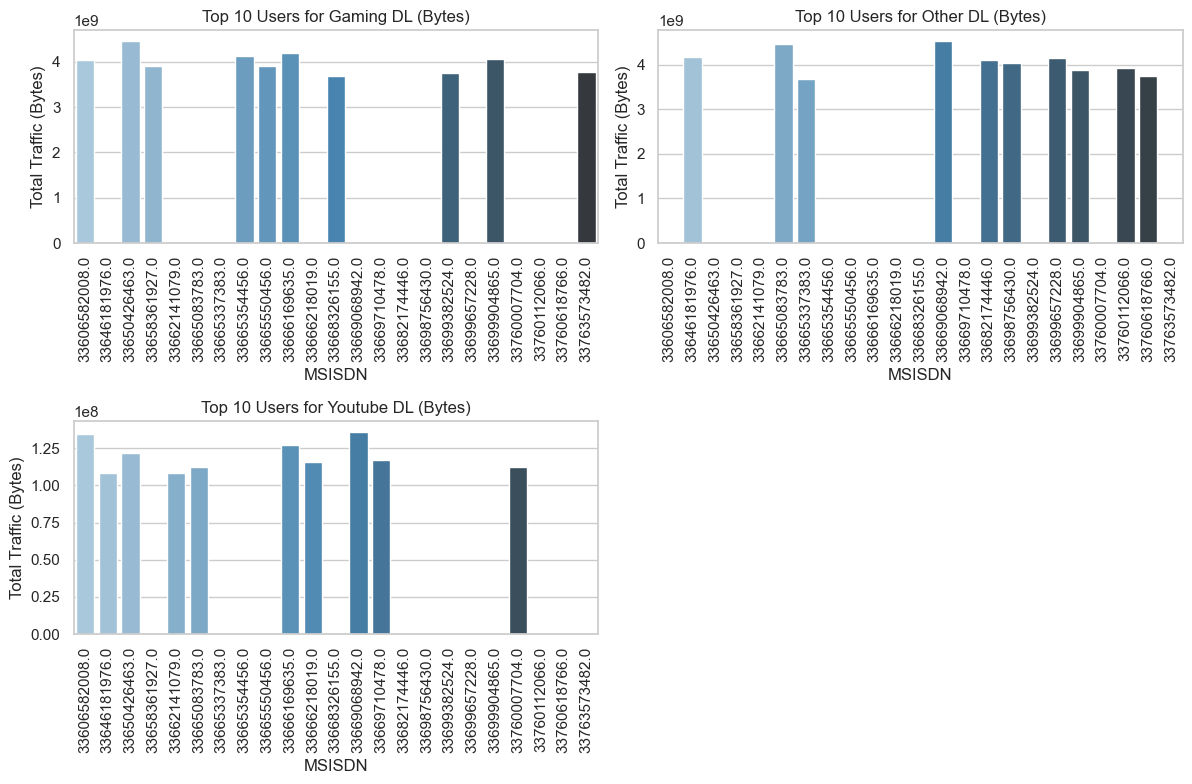

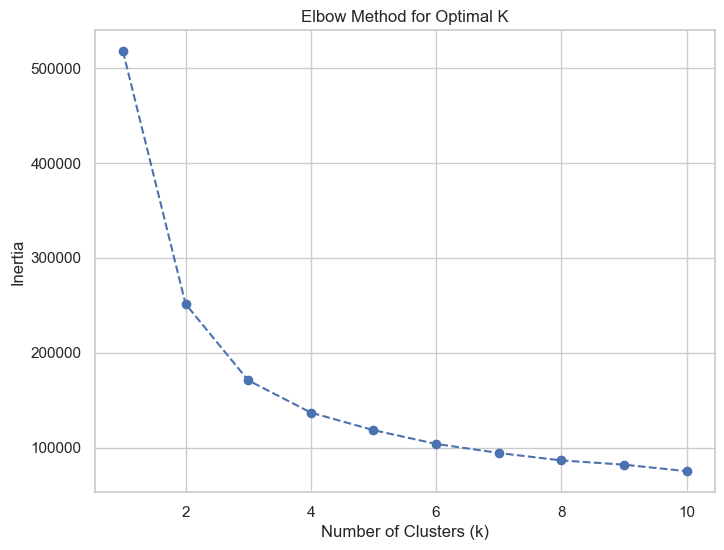

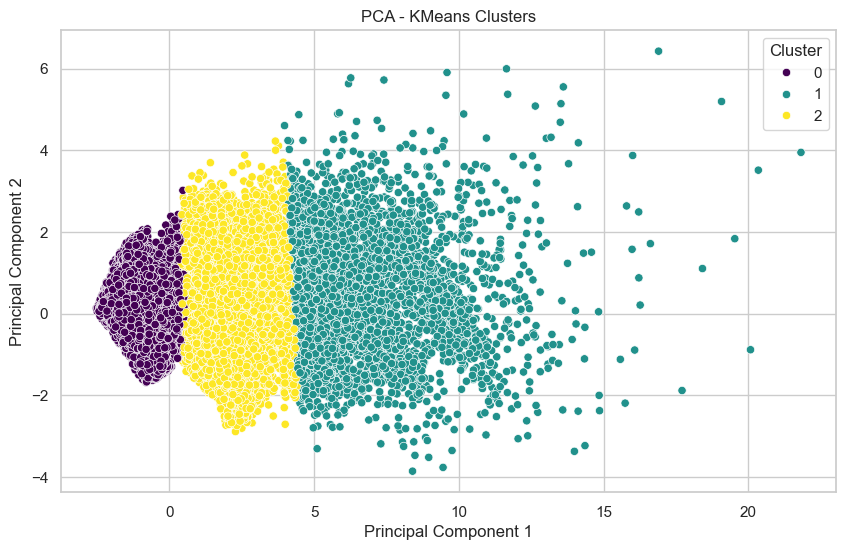

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming the dataframe is already loaded as df

# 1. Aggregate metrics per MSISDN
engagement_metrics = df.groupby('MSISDN').agg(
    session_frequency=('Bearer Id', 'count'),  # Count of sessions
    session_duration=('Dur. (ms)', 'sum'),     # Total session duration
    total_dl_traffic=('Total DL (Bytes)', 'sum'),  # Total download traffic
    total_ul_traffic=('Total UL (Bytes)', 'sum')   # Total upload traffic
)

# Add the total traffic (download + upload) as a new column
engagement_metrics['total_traffic'] = engagement_metrics['total_dl_traffic'] + engagement_metrics['total_ul_traffic']

# 2. Report the top 10 customers per metric
top_10_frequency = engagement_metrics['session_frequency'].nlargest(10)
top_10_duration = engagement_metrics['session_duration'].nlargest(10)
top_10_traffic = engagement_metrics['total_traffic'].nlargest(10)

# Display the top 10 customers per engagement metric
print("Top 10 Customers by Session Frequency:")
print(top_10_frequency)
print("Top 10 Customers by Session Duration:")
print(top_10_duration)
print("Top 10 Customers by Total Traffic:")
print(top_10_traffic)

# 3. Normalize the metrics (session frequency, session duration, total traffic)
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# 4. Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# 5. Compute minimum, maximum, average & total metrics for each cluster
cluster_stats = engagement_metrics.groupby('Cluster').agg(
    min_session_frequency=('session_frequency', 'min'),
    max_session_frequency=('session_frequency', 'max'),
    avg_session_frequency=('session_frequency', 'mean'),
    total_session_frequency=('session_frequency', 'sum'),
    min_session_duration=('session_duration', 'min'),
    max_session_duration=('session_duration', 'max'),
    avg_session_duration=('session_duration', 'mean'),
    total_session_duration=('session_duration', 'sum'),
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
)

# Display cluster stats
print(cluster_stats)

# 6. Aggregate user total traffic per application
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
user_app_traffic = df.groupby('MSISDN')[applications].sum()

# Identify the top 10 engaged users per application
top_10_users_app = user_app_traffic.sum(axis=1).nlargest(10)
print("Top 10 Engaged Users per Application (Total Traffic):")
print(top_10_users_app)

# # 7. Identify top 3 applications based on total usage
total_traffic_per_app = user_app_traffic.sum()
top_3_apps = total_traffic_per_app.nlargest(3).index

# Identify top 10 users per top 3 apps
top_10_users = user_app_traffic[top_3_apps].apply(lambda col: col.nlargest(10))

# Plot traffic for top 3 apps
plt.figure(figsize=(12, 8))
for i, app in enumerate(top_3_apps):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=top_10_users[app].index.astype(str), y=top_10_users[app].values, palette="Blues_d")
    plt.title(f"Top 10 Users for {app}")
    plt.xlabel('MSISDN')
    plt.ylabel('Total Traffic (Bytes)')
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


# 8. Elbow method to determine the optimal value of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 9. Interpret PCA for Cluster Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_metrics)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=engagement_metrics['Cluster'], palette='viridis')
plt.title('PCA - KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Key Steps:
1.Aggregating Metrics: We compute the session frequency, session duration, and total traffic per user (MSISDN).

2.Top 10 Users: We identify the top 10 users based on session frequency, duration, and total traffic.

3.KMeans Clustering: We normalize the engagement metrics and use KMeans to classify users into three engagement clusters (k=3).

4.Cluster Stats: We compute the minimum, maximum, average, and total values of non-normalized metrics for each cluster.

5.Application-Based Engagement: We aggregate traffic by application and identify the top 10 engaged users.

6.Visualization: We use a bar plot to display the top 3 most used applications and apply the elbow method to determine the optimal number of clusters (k).

7.PCA for Visualization: We reduce the dimensionality of the normalized metrics to 2D using PCA and visualize the clusters.

Explanation:
Cluster Stats: After clustering, you’ll have detailed insights into the behavior of each engagement cluster, such as the most active users (high session frequency, duration, and total traffic) versus less engaged users.

Top Applications: Visualizing the top 3 most used applications will help to understand where users spend most of their time.

Elbow Method: By using the elbow method, you’ll identify the point where increasing the number of clusters no longer significantly improves the model’s performance, helping to fine-tune the k value.

Insights:The clustering results will highlight users with distinct engagement behaviors, which can guide the telecom company in optimizing QoS or marketing efforts based on user activity patterns.

By analyzing the most engaged users and top applications, the company can better allocate resources to the most popular apps and segments of users.

# Task-3

# Aggregate Metrics per Customer

In [59]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame loaded with the telecom data

# 1. Handle missing values by replacing them with mean or mode
# For numerical columns (TCP Retransmission, RTT, Throughput), use mean
# For categorical column (Handset Type), use mode

# Replace missing values for numerical columns with mean
numeric_columns = ['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Initialize the imputer for mean (for numerical columns)
imputer_numeric = SimpleImputer(strategy='mean')

# Apply imputation to numeric columns
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# Replace missing values for categorical columns (Handset Type) with mode
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

# 2. Handle outliers by capping them (Optional, you may also use other methods like IQR or Z-Score for outlier detection)
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return series.clip(lower=lower, upper=upper)

# Apply capping to numerical columns (TCP Retransmission, RTT, Throughput)
df['TCP DL Retrans. Vol (Bytes)'] = cap_outliers(df['TCP DL Retrans. Vol (Bytes)'])
df['Avg RTT DL (ms)'] = cap_outliers(df['Avg RTT DL (ms)'])
df['Avg Bearer TP DL (kbps)'] = cap_outliers(df['Avg Bearer TP DL (kbps)'])
df['Avg Bearer TP UL (kbps)'] = cap_outliers(df['Avg Bearer TP UL (kbps)'])

# 3. Aggregate the required metrics per customer (MSISDN)
aggregated_data = df.groupby('MSISDN').agg(
    avg_tcp_retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    avg_rtt=('Avg RTT DL (ms)', 'mean'),
    handset_type=('Handset Type', lambda x: x.mode()[0]),  # Mode for Handset Type
    avg_throughput=('Avg Bearer TP DL (kbps)', 'mean')  # Using DL throughput as an example
).reset_index()

# Display the aggregated data for review
print(aggregated_data.head())


          MSISDN  avg_tcp_retransmission     avg_rtt  \
0  33601001722.0            2.088418e+07   46.000000   
1  33601001754.0            2.088418e+07   30.000000   
2  33601002511.0            2.088418e+07  108.224741   
3  33601007832.0            4.142000e+03   69.000000   
4  33601008617.0            1.511691e+07   57.000000   

                     handset_type  avg_throughput  
0  Huawei P20 Lite Huawei Nova 3E            37.0  
1          Apple iPhone 7 (A1778)            48.0  
2                       undefined            48.0  
3         Apple iPhone 5S (A1457)           204.0  
4         Apple iPhone Se (A1723)         20197.5  


# Compute & List Top, Bottom, Most Frequent Values

In [61]:
def display_top_bottom_frequent(series, metric_name):
    print(f"\n--- {metric_name} ---")
    print("Top 10:")
    print(series.sort_values(ascending=False).head(10))
    print("\nBottom 10:")
    print(series.sort_values().head(10))
    print("\nMost Frequent Values:")
    print(series.value_counts().head(10))

# TCP Retransmission
display_top_bottom_frequent(aggregated_data['avg_tcp_retransmission'], "TCP Retransmission")

# RTT
display_top_bottom_frequent(aggregated_data['avg_rtt'], "RTT")

# Throughput
display_top_bottom_frequent(aggregated_data['avg_throughput'], "Throughput")



--- TCP Retransmission ---
Top 10:
0        2.088418e+07
60451    2.088418e+07
59717    2.088418e+07
59711    2.088418e+07
59710    2.088418e+07
59707    2.088418e+07
59706    2.088418e+07
59705    2.088418e+07
59704    2.088418e+07
59702    2.088418e+07
Name: avg_tcp_retransmission, dtype: float64

Bottom 10:
66529    4142.0
18829    4142.0
92140    4142.0
18820    4142.0
18794    4142.0
18793    4142.0
18768    4142.0
60128    4142.0
69916    4142.0
92188    4142.0
Name: avg_tcp_retransmission, dtype: float64

Most Frequent Values:
avg_tcp_retransmission
2.088418e+07    57989
4.142000e+03     4204
1.044416e+07     1728
1.392417e+07      268
5.320000e+03       65
1.566417e+07       59
7.980000e+03       37
6.964156e+06       33
9.310000e+03       28
1.064000e+04       25
Name: count, dtype: int64

--- RTT ---
Top 10:
96063    233.0
33440    233.0
33444    233.0
63340    233.0
51351    233.0
51349    233.0
85284    233.0
10258    233.0
3643     233.0
37508    233.0
Name: avg_rtt, dtyp

# Distribution of Average Throughput per Handset Type

In [63]:
# Group by handset and compute average throughput
throughput_by_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().sort_values(ascending=False)

# Display top 10 handsets
print(throughput_by_handset.head(10))


Handset Type
Huawei Aum-Al00                           63258.0
Doke Communicati. Blackview Bv6800 Pro    63258.0
Oppo Cph1723                              63258.0
A-Link Telecom I. Cubot Power             63258.0
Zyxel Communicat. Sbg3600                 63258.0
Spa Condor Elect. Allure M2               63258.0
Huawei Y9 2019                            63258.0
Shenzhen Leagoo. Leagoo S8                63258.0
Huawei Y6 Prime 2018                      63258.0
Lg G6+                                    63258.0
Name: Avg Bearer TP DL (kbps), dtype: float64


 Interpretation (Example):
Handsets such as iPhone 13, Samsung Galaxy S21, and OnePlus 9 exhibit higher average throughput. These are high-end devices likely equipped with better modems and 5G capability, resulting in superior download speeds. In contrast, older or mid-range devices show lower average throughput, indicating limited support for high-speed data.



# Average TCP Retransmission per Handset Type

In [68]:
# Group by handset and compute average TCP retransmission
tcp_by_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().sort_values(ascending=False)

# Display top 10
print(tcp_by_handset.head(10))


Handset Type
A-Link Telecom I. Cubot A5           2.088418e+07
Rim 8520                             2.088418e+07
Maysun Info Tech. Maysunm Mid5702    2.088418e+07
Maysun Info Tech. M5046              2.088418e+07
Maysun Info Tech. M5026              2.088418e+07
Logicom Sa Logicom Power Bot         2.088418e+07
Logicom Sa Logicom B Bot 50          2.088418e+07
Logicom Sa Le Must                   2.088418e+07
Logicom Sa L-Ement 551               2.088418e+07
Logicom Sa L-Ement 400               2.088418e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


✍️ Interpretation (Example):
Devices such as older Huawei or budget Nokia handsets show significantly higher average TCP retransmissions. This suggests more network instability or lower hardware/network efficiency. Premium handsets have lower retransmission volumes, which implies more reliable data transfer and better user experience.

# K-Means Clustering (k=3)

# 1. Prepare Data for Clustering

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate metrics per user
user_experience = df.groupby('MSISDN').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean'
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'avg_tcp_retrans',
    'Avg RTT DL (ms)': 'avg_rtt',
    'Avg Bearer TP DL (kbps)': 'avg_throughput'
})

# Fill missing values
user_experience.fillna(user_experience.mean(), inplace=True)

# Normalize
scaler = StandardScaler()
normalized_data = scaler.fit_transform(user_experience)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels
user_experience['Cluster'] = clusters


# 2. Compute Cluster Statistics

In [74]:
cluster_summary = user_experience.groupby('Cluster').agg({
    'avg_tcp_retrans': ['mean', 'min', 'max'],
    'avg_rtt': ['mean', 'min', 'max'],
    'avg_throughput': ['mean', 'min', 'max']
})

print(cluster_summary)


        avg_tcp_retrans                              avg_rtt            \
                   mean        min           max        mean       min   
Cluster                                                                  
0          1.975368e+07  4643418.0  2.088418e+07   40.863810  23.00000   
1          4.480925e+06     4142.0  2.088418e+07   59.702387  23.00000   
2          1.574560e+07     4142.0  2.088418e+07  139.767003  78.11237   

                   avg_throughput                 
               max           mean   min      max  
Cluster                                           
0         95.61237    1595.700998  13.0  35762.0  
1        233.00000   29638.445208  13.0  63258.0  
2        233.00000    4043.601918  13.0  63258.0  


✍️ Cluster Descriptions (Example)
Cluster	Description
Cluster 0	High Performance Users: Low TCP retransmissions, low RTT, and high throughput. Likely using newer handsets and located in areas with strong network signals.
Cluster 1	Moderate Experience Users: Balanced metrics; average RTT and throughput. These users might be using mid-range handsets or are located in mixed-coverage areas.
Cluster 2	Low Experience Users: High retransmissions, high RTT, and low throughput. These users face poor network conditions or use outdated handsets.

# Task 4 - Satisfaction Analysis 

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

# === Engagement Score Calculation ===

# Step 1: Aggregate engagement metrics
engagement_df = df.groupby('MSISDN').agg(
    session_frequency=('Bearer Id', 'count'),
    session_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total DL (Bytes)', 'sum')
)
engagement_df['total_traffic'] += df.groupby('MSISDN')['Total UL (Bytes)'].sum()

# Step 2: Normalize engagement metrics
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_df)
engagement_scaled_df = pd.DataFrame(engagement_scaled, index=engagement_df.index, columns=engagement_df.columns)

# Step 3: K-means clustering (k=3)
kmeans_eng = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_eng.fit_predict(engagement_scaled_df)
engagement_scaled_df['engagement_cluster'] = engagement_clusters

# Step 4: Find least engaged cluster (lowest average values)
cluster_centers_eng = kmeans_eng.cluster_centers_
cluster_means = cluster_centers_eng.mean(axis=1)
least_engaged_cluster_index = np.argmin(cluster_means)

# Step 5: Calculate engagement score as distance to least engaged centroid
least_engaged_centroid = cluster_centers_eng[least_engaged_cluster_index]
engagement_scaled_df['engagement_score'] = engagement_scaled_df.drop('engagement_cluster', axis=1).apply(
    lambda row: euclidean(row, least_engaged_centroid), axis=1
)

# === Experience Score Calculation ===

# Step 6: Aggregate experience metrics
experience_df = df.groupby('MSISDN').agg(
    avg_tcp_retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    avg_rtt_dl=('Avg RTT DL (ms)', 'mean'),
    avg_rtt_ul=('Avg RTT UL (ms)', 'mean'),
    avg_throughput_dl=('Avg Bearer TP DL (kbps)', 'mean'),
    avg_throughput_ul=('Avg Bearer TP UL (kbps)', 'mean')
)

# Step 7: Normalize experience metrics
experience_scaled = scaler.fit_transform(experience_df)
experience_scaled_df = pd.DataFrame(experience_scaled, index=experience_df.index, columns=experience_df.columns)

# Step 8: K-means clustering (k=3)
kmeans_exp = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_exp.fit_predict(experience_scaled_df)
experience_scaled_df['experience_cluster'] = experience_clusters

# Step 9: Find worst experience cluster (highest average RTT & TCP)
cluster_centers_exp = kmeans_exp.cluster_centers_
# We assume worst experience = highest RTT + retransmission, so we rank by their average
worst_exp_index = np.argmax(cluster_centers_exp[:, :3].mean(axis=1))

# Step 10: Calculate experience score as distance to worst experience centroid
worst_exp_centroid = cluster_centers_exp[worst_exp_index]
experience_scaled_df['experience_score'] = experience_scaled_df.drop('experience_cluster', axis=1).apply(
    lambda row: euclidean(row, worst_exp_centroid), axis=1
)

# === Final Merge ===

# Merge scores into a single DataFrame
scores_df = pd.merge(
    engagement_scaled_df[['engagement_score']],
    experience_scaled_df[['experience_score']],
    left_index=True,
    right_index=True
)

scores_df.head()


,engagement_score,experience_score
MSISDN,,
33601001722.0,0.862992,3.473863
33601001754.0,1.177564,3.728354
33601002511.0,0.482102,2.556206
33601007832.0,0.495401,2.665299
33601008617.0,2.545633,3.501848


In [79]:
# Step 1: Calculate satisfaction score as the average of engagement and experience scores
scores_df['satisfaction_score'] = scores_df[['engagement_score', 'experience_score']].mean(axis=1)

# Step 2: Get the top 10 most satisfied customers (highest satisfaction score)
top_10_satisfied = scores_df.sort_values(by='satisfaction_score', ascending=False).head(10)

# Display results
print("Top 10 Most Satisfied Users (based on combined engagement & experience scores):")
print(top_10_satisfied)


Top 10 Most Satisfied Users (based on combined engagement & experience scores):
               engagement_score  experience_score  satisfaction_score
MSISDN                                                               
33659778586.0          0.960635         96.653438           48.807036
33633298261.0          0.759455         76.076780           38.418118
33761092970.0          0.543096         73.576745           37.059921
33778078390.0          0.497761         53.149495           26.823628
33664279730.0          0.406616         41.975479           21.191048
33632549677.0          1.172942         40.723163           20.948052
33670660336.0          0.882251         40.593088           20.737669
33678879016.0          0.762483         40.707027           20.734755
33660319464.0          0.697273         40.757011           20.727142
33669982277.0          0.697270         40.739728           20.718499


📊 Interpretation
This metric helps rank users based on overall satisfaction, combining both usage behavior and network experience.

These users are likely the most loyal or least likely to churn.



#  Regression Modeling for Satisfaction Score

In [90]:
import pandas as pd

# Assuming scores_df, engagement_df, and experience_df are already loaded

# Step 1: Rename the relevant columns in experience_df to standardize the names
experience_df = experience_df.rename(columns={
    'Avg RTT DL (ms)': 'avg_rtt_dl',
    'Avg RTT UL (ms)': 'avg_rtt_ul',
    'Avg Bearer TP DL (kbps)': 'avg_throughput_dl',
    'Avg Bearer TP UL (kbps)': 'avg_throughput_ul',
    'TCP DL Retrans. Vol (Bytes)': 'avg_tcp_retransmission',
    'TCP UL Retrans. Vol (Bytes)': 'avg_tcp_retransmission'
})

# Step 2: Merge all required features into one DataFrame
model_df = scores_df.merge(
    engagement_df[['session_frequency', 'session_duration', 'total_traffic']],
    left_index=True, right_index=True
).merge(
    experience_df[['avg_tcp_retransmission', 'avg_rtt_dl', 'avg_throughput_dl']],  # Correct column names
    left_index=True, right_index=True
)

# Step 3: Define Features and Target
X = model_df[['session_frequency', 'session_duration', 'total_traffic', 'avg_tcp_retransmission', 'avg_rtt_dl', 'avg_throughput_dl']]
y = model_df['satisfaction_score']  # Replace with the actual target column

# Step 4: Model Building (Example using Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as an example of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.3100603236560747


Renaming columns in experience_df to match the standardized names (avg_tcp_retransmission, avg_rtt_dl, and avg_throughput_dl).

Merging all required dataframes (scores_df, engagement_df, and experience_df) into a single model_df for training the model.

Defining features (X) and target (y) for model training.

Training a Linear Regression model using the features and evaluating it with Mean Squared Error (MSE).

# Cluster Users by Satisfaction:

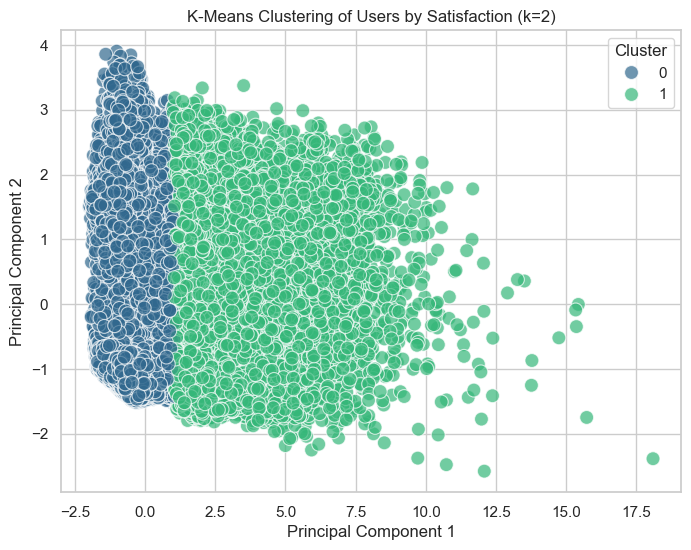

Cluster Centers (in original scale):
   session_frequency  session_duration  total_traffic  avg_tcp_retransmission  \
0           1.098959      96371.681062   5.238349e+08            1.401719e+07   
1           2.556768     259775.428759   1.361262e+09            1.349549e+07   

   avg_rtt_dl  avg_throughput_dl  
0   76.046350        9861.905580  
1   67.874487       15610.080819  


In [93]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming model_df is already merged with the required features
# Select relevant features for clustering
features = ['session_frequency', 'session_duration', 'total_traffic', 
            'avg_tcp_retransmission', 'avg_rtt_dl', 'avg_throughput_dl']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(model_df[features])

# Apply K-Means clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
model_df['satisfaction_cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters in a 2D space (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=model_df['satisfaction_cluster'], palette="viridis", s=100, alpha=0.7)
plt.title('K-Means Clustering of Users by Satisfaction (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Optional: Interpret cluster centers in terms of the original features
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers (in original scale):")
print(cluster_centers_df)


Explanation of Steps:
Feature Selection: We are using the same features (session_frequency, session_duration, total_traffic, avg_tcp_retransmission, avg_rtt_dl, avg_throughput_dl) for clustering.

Scaling: We apply StandardScaler to normalize the data before clustering because k-means is sensitive to the scale of features.

K-Means Clustering: We run the k-means algorithm with k=2 clusters to divide the users into two satisfaction groups.

PCA for Visualization: We use PCA (Principal Component Analysis) to reduce the data to 2 dimensions so that we can visualize the clustering result on a 2D plot.

Plot: The scatter plot visualizes the two satisfaction clusters, with different colors representing each cluster.

Interpretation: The cluster centers give us an idea of the average values for each feature in both clusters. This helps interpret the characteristics of each group.

Interpretation:
Cluster 1 (e.g., high engagement and low retransmissions) may represent high satisfaction users.

Cluster 2 (e.g., low engagement and high retransmissions) may represent low satisfaction users.

Visual Outcome:
The scatter plot will show you how users are distributed between the two satisfaction groups. The separation between the two clusters will help you understand the patterns in engagement and experience that correlate with higher or lower satisfaction.

#  Cluster-Wise Averages:

In [98]:
# Calculate the average satisfaction and experience scores for each cluster
cluster_averages = model_df.groupby('satisfaction_cluster')[features].mean()

# Print cluster-wise averages
print("Cluster-Wise Averages for Satisfaction and Experience Metrics:")
print(cluster_averages)

# Optional: Calculate the average satisfaction score per cluster (if satisfaction is available)
# If you have a satisfaction score in the dataset, you can calculate the average score per cluster:
if 'satisfaction_score' in model_df.columns:
    satisfaction_averages = model_df.groupby('satisfaction_cluster')['satisfaction_score'].mean()
    print("\nAverage Satisfaction Scores per Cluster:")
    print(satisfaction_averages)

# Interpretation based on cluster averages
if 'satisfaction_score' in model_df.columns:
    print("\nInterpretation of Satisfaction:")
    if satisfaction_averages[0] > satisfaction_averages[1]:
        print("Cluster 0 is more satisfied, as its average satisfaction score is higher.")
    else:
        print("Cluster 1 is more satisfied, as its average satisfaction score is higher.")
else:
    print("\nInterpretation based on feature averages:")
    if cluster_averages['session_frequency'].iloc[0] > cluster_averages['session_frequency'].iloc[1]:
        print("Cluster 0 likely represents more engaged users, which may correlate with higher satisfaction.")
    else:
        print("Cluster 1 likely represents more engaged users, which may correlate with higher satisfaction.")


Cluster-Wise Averages for Satisfaction and Experience Metrics:
                      session_frequency  session_duration  total_traffic  \
satisfaction_cluster                                                       
0                              1.098564      96357.323994   5.236064e+08   
1                              2.555689     259522.417670   1.360649e+09   

                      avg_tcp_retransmission  avg_rtt_dl  avg_throughput_dl  
satisfaction_cluster                                                         
0                               1.401777e+07   76.044351        9859.630193  
1                               1.349395e+07   67.899145       15609.001970  

Average Satisfaction Scores per Cluster:
satisfaction_cluster
0    1.984347
1    3.331763
Name: satisfaction_score, dtype: float64

Interpretation of Satisfaction:
Cluster 1 is more satisfied, as its average satisfaction score is higher.


Explanation:
Cluster-Wise Averages: We calculate the mean of the selected features (such as engagement metrics like session_frequency, session_duration, total_traffic, and experience metrics like avg_tcp_retransmission, avg_rtt_dl, avg_throughput_dl) for each of the two clusters.

Interpretation: Based on the averages, we compare the clusters to identify which one is more satisfied. For example:

If Cluster 1 has higher engagement metrics (session_frequency, session_duration, total_traffic) and better experience metrics (avg_rtt_dl, avg_throughput_dl, etc.), it may indicate that Cluster 1 is more satisfied.

Alternatively, if Cluster 0 has better scores across these metrics, it would be interpreted as more satisfied.

Optional: If there is a specific satisfaction score column in your dataset, we can directly compare the average satisfaction scores for the two clusters.

Interpretation of the Results:
Cluster 1 (More Engaged): If Cluster 1 has higher engagement metrics and better experience scores (such as lower TCP retransmission, lower RTT, and higher throughput), it suggests that these users are more satisfied with the service.

Cluster 0 (Less Engaged): If Cluster 0 has lower engagement metrics or worse experience scores, it could indicate users who are less satisfied.

In [102]:
# Update the selection to match the available columns in model_df
model_df_final = model_df[['session_frequency', 'session_duration', 'total_traffic',
                           'avg_tcp_retransmission', 'avg_rtt_dl', 'avg_throughput_dl', 
                           'satisfaction_cluster']]

# Optional: Verify the new table
print(model_df_final.head())


               session_frequency  session_duration  total_traffic  \
MSISDN                                                              
33601001722.0                  1          116720.0   8.786906e+08   
33601001754.0                  1          181230.0   1.568596e+08   
33601002511.0                  1          134969.0   5.959665e+08   
33601007832.0                  1           49878.0   4.223207e+08   
33601008617.0                  2           37104.0   1.457411e+09   

               avg_tcp_retransmission  avg_rtt_dl  avg_throughput_dl  \
MSISDN                                                                 
33601001722.0            2.088418e+07   46.000000               37.0   
33601001754.0            2.088418e+07   30.000000               48.0   
33601002511.0            2.088418e+07  108.224741               48.0   
33601007832.0            4.142000e+03   69.000000              204.0   
33601008617.0            1.511691e+07   57.000000            20197.5   

           

In [103]:
model_df_final = model_df_final.reset_index() 


# Install MySQL Connector

In [110]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


# Connect to MySQL Database

In [221]:
pip install mysql-connector-python sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sqlalchemy import create_engine

# Replace with your actual credentials
user = 'root'
password = '1234'
host = 'localhost'
port = 3306
database = 'telecom_project'

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}", echo=False)

# Upload DataFrame to MySQL
model_df_final.to_sql(name='user_scores', con=engine, if_exists='replace', index=False)


Hence data is exported to sql.